# <center> Майнор "Интеллектуальный анализ данных" <center>

# <center> Курс "Современные методы машинного обучения" <center>

# <center> Лабораторная работа №1. Supervised learning <center>

## Table of contents  
  
* [Часть 1. Работа с данными](#part1)
* [Часть 2. Методы машинного обучения](#part2)
* [Часть 3. Соревнование по машинному обучению](#part3)

## Часть 1. Работа с данными <a id="part1"></a>

В данной части лабораторной вам предстоит работать с данными по оттоку клиентов одной телекомуникационной компании. Оригинал данных доступен [здесь](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383). Для лабораторной работы данные были модифицированы.

Данные находятся в файле `telecom_churn_mod.csv`

**Описание данных:**

In [1]:
import numpy as np
import pandas as pd

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# стиль seaborn
# style.available выводит все доступные стили
from matplotlib import style
style.use('seaborn')

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

# отключим предупреждения Anaconda
# import warnings
# warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_colwidth', -1)

In [3]:
pd.read_csv('telecom_churn_description.csv')

Признак                                      Описание  \
0   ID                      Уникальный идентификатор объекта               
1   Sex                     Пол                                            
2   Age                     Возраст                                        
3   State                   Буквенный код штата                            
4   Account length          Как долго клиент обслуживается компанией       
5   Phone number            Номер телефона клиента                         
6   Plans                   Подключенные планы                             
7   Number vmail messages   Количество голосовых сообщений                 
8   Total day minutes       Общая длительность разговоров днем             
9   Total day calls         Общее количество звонков днем                  
10  Total day charge        Общая сумма оплаты за услуги днем              
11  Total eve minutes       Общая длительность разговоров вечером          
12  Total eve calls         Общее количество звонков вечером               
13  Total eve charge        Общая сумма оплаты за услуги вечером           
14  Total night minutes     Общая длительность разговоров ночью            
15  Total night calls       Общее количество звонков ночью                 
16  Total night charge      Общая сумма оплаты за услуги ночью             
17  Total intl minutes      Общая длительность международных разговоров    
18  Total intl calls        Общее количество международных разговоров      
19  Total intl charge       Общая сумма оплаты за международные разговор   
20  Total charge            Общая сумма оплаты за услуги                   
21  Customer service calls  Число обращений в сервисный центр              
22  Churn                   Отток клиента (остался или ушел)               

                                                    Тип  
0   Числовой (integer)                                   
1   Символьный                                           
2   Числовой (integer)                                   
3   Символьный                                           
4   Числовой (integer)                                   
5   Символьный                                           
6   Символьный (None; International/Voice mail or both)  
7   Числовой (integer)                                   
8    Числовой (float)                                    
9   Числовой (float)                                     
10  Числовой (float)                                     
11  Числовой (float)                                     
12  Числовой (float)                                     
13  Числовой (float)                                     
14  Числовой (float)                                     
15  Числовой (float)                                     
16  Числовой (float)                                     
17  Числовой (float)                                     
18  Числовой (float)                                     
19  Числовой (float)                                     
20  Числовой (float)                                     
21   Числовой (integer)                                  
22  Логический (True - ушел; False - остался)

### Задание 1  
  
Считайте данные из файла. Оцените размерность данных, есть ли в данных пропущенные значения. Посмотрите на автоматически определенные типы признаков.

In [4]:
telecom_data = pd.read_csv('telecom_churn_mod.csv', sep=';')
telecom_data.head()

ID     Sex   Age State  Account length   Phone number          Plans  \
0  40075  Female  37.0  KS    128             415 424 17 55  Voice mail      
1  17475  Female NaN    OH    107             415 759 41 43  Voice mail      
2  62242  Female  19.0  NJ    137             415 213 11 40  None            
3  81231  Female  31.0  OH    84              408 487 53 35  International   
4  78542  Female  30.0  OK    75              415 509 25 27  International   

   Number vmail messages Total day minutes Total day calls  Total day charge  \
0  25                     265.1             110.0           45.07              
1  26                     161.6             123.0           27.47              
2  0                      243.4             114.0           41.38              
3  0                      299.4             71.0            50.90              
4  0                      166.7             113.0           28.34              

   Total eve minutes  Total eve calls  Total eve charge Total night minutes  \
0  197.4              99.0             16.78             244.7                
1  195.5              103.0            16.62             254.4                
2  121.2              110.0            10.30             l62.6                
3  61.9               88.0             5.26              196.9                
4  148.3              122.0            12.61             186.9                

   Total night calls  Total night charge Total intl minutes  Total intl calls  \
0  91.0               11.01               10.0               3.0                
1  103.0              11.45               13.7               3.0                
2  104.0              7.32                12.2               5.0                
3  89.0               8.86                6.6                7.0                
4  121.0              8.41                10.1               3.0                

   Total intl charge Total charge Customer service calls  Churn  
0  2.70               75.56        1                      False  
1  3.70               59.24        1                      False  
2  3.29               62.29        0                      False  
3  1.78               66.8         2                      False  
4  2.73               52.09        3                      False

In [5]:
telecom_data.shape

(3333, 23)

In [6]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
ID                        3333 non-null int64
Sex                       3333 non-null object
Age                       2333 non-null float64
State                     3333 non-null object
Account length            3333 non-null int64
Phone number              3333 non-null object
Plans                     3233 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null object
Total day calls           3333 non-null object
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null float64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null object
Total night calls         3333 non-null float64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null object
Total intl calls          3333 non-null flo

По двум признакам есть пропущенные значения. Также некоторые числовые признаки были определены как категориальные

### Задание 2  
  
Приведите числовые признаки, которые были распознаны некорректно, к числовому типу данных.  
Найдите и опишите ошибки в данных, которые мешают приведению типов. Сколько признаков содержат ошибки, сколько наблюдений по каждому такому признаку? Исправьте эти ошибки и снова выполните приведение типов.  
**NB:** Исправлять ошибки необходимо программно (используя python), изменять исходный файл "руками" не разрешается. 

При попытке привести значения к численному виду были найдены схожие ошибки

In [7]:
features_to_float = ['Total day minutes', 'Total day calls', 'Total night minutes', 'Total intl minutes']
for feature in features_to_float:
    telecom_data[feature] = telecom_data[feature].str.replace(',' , '.')
    telecom_data[feature] = telecom_data[feature].str.replace('o' , '0')
    telecom_data[feature] = telecom_data[feature].str.replace('l' , '1')
    telecom_data[feature] = telecom_data[feature].astype('float64')

Также встретились ошибки по типу '1.3843 hundred', в этом случае умножаем данное число на 100

In [8]:
for value in telecom_data['Total charge'].values:
    list_of_values = value.split(' ')
    if len(list_of_values) > 1:
        #print(list_of_values)
        telecom_data['Total charge'] = telecom_data['Total charge'].str.replace(list_of_values[0] , 
                                                                                str(float(list_of_values[0])*100))
telecom_data['Total charge'] = telecom_data['Total charge'].str.replace('[a-z]', '', regex=True)        
  

In [9]:
telecom_data['Total charge'] = telecom_data['Total charge'].astype('float64')

In [10]:
telecom_data['Customer service calls'] = telecom_data['Customer service calls'].str.replace('o' , '0')

In [11]:
telecom_data['Customer service calls'] = telecom_data['Customer service calls'].astype('int64')

In [12]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
ID                        3333 non-null int64
Sex                       3333 non-null object
Age                       2333 non-null float64
State                     3333 non-null object
Account length            3333 non-null int64
Phone number              3333 non-null object
Plans                     3233 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null float64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null float64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null float64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null

### Задание 3  
  
Оцените набор данных на предмет пропущенных значений. Какие признаки содержат пропуски? Сколько наблюдений с пропусками по каждому такому признаку?  
По каждому признаку предложите и обоснуйте, что делать с пропущенными значениями. 

Почти треть значений по признаку Age пропущены - удалять их нельзя

In [13]:
is_age_missed = telecom_data['Age'].isnull()
telecom_data['is_age_missed'] = is_age_missed.astype('int64')

In [14]:
is_age_missed.head()

0    False
1    True 
2    False
3    False
4    False
Name: Age, dtype: bool

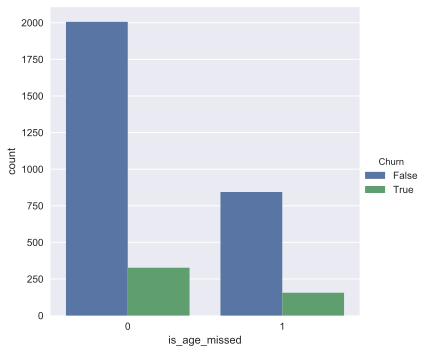

In [15]:
sns.catplot(x='is_age_missed', 
               hue='Churn', 
               data=telecom_data, 
               kind='count', 
               height = 5)

In [16]:
X = telecom_data[['is_age_missed', 'Churn', 'ID']].groupby(['is_age_missed', 'Churn'], as_index=False).count()
X

is_age_missed  Churn    ID
0  0              False  2006
1  0              True   327 
2  1              False  844 
3  1              True   156

In [17]:
x = X.groupby('is_age_missed')['ID'].transform('sum')
x

0    2333
1    2333
2    1000
3    1000
Name: ID, dtype: int64

In [18]:
X['Frac'] = np.round(X.ID.div(x), 5)
X

is_age_missed  Churn    ID     Frac
0  0              False  2006  0.85984
1  0              True   327   0.14016
2  1              False  844   0.84400
3  1              True   156   0.15600

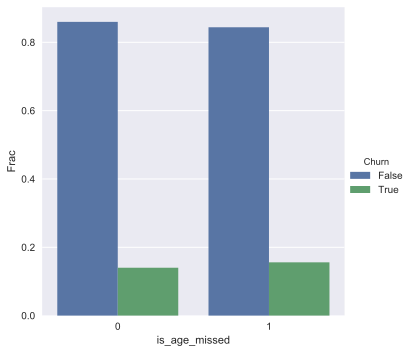

In [19]:
sns.catplot(x='is_age_missed', 
               y='Frac',
               hue='Churn', 
               data=X, 
               kind='bar', 
               height = 5)

Распределение по классам практически одинаковое, значит не будем сохранять признак is_age_missed


In [20]:
telecom_data.drop(['is_age_missed'], axis=1, inplace = True)

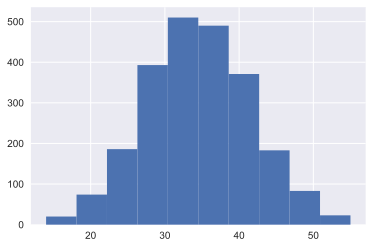

In [21]:
telecom_data.Age.hist()

Пропущенные значения заменим средним

In [22]:
telecom_data.Age.fillna(round(telecom_data.Age.mean(),0), inplace=True)

In [23]:
telecom_data['Age'] = telecom_data['Age'].astype('int64')

Пропущенные значения по признаку Plans удалим

In [24]:
telecom_data.dropna(subset=['Plans'], inplace=True)

In [25]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3233 entries, 0 to 3332
Data columns (total 23 columns):
ID                        3233 non-null int64
Sex                       3233 non-null object
Age                       3233 non-null int64
State                     3233 non-null object
Account length            3233 non-null int64
Phone number              3233 non-null object
Plans                     3233 non-null object
Number vmail messages     3233 non-null int64
Total day minutes         3233 non-null float64
Total day calls           3233 non-null float64
Total day charge          3233 non-null float64
Total eve minutes         3233 non-null float64
Total eve calls           3233 non-null float64
Total eve charge          3233 non-null float64
Total night minutes       3233 non-null float64
Total night calls         3233 non-null float64
Total night charge        3233 non-null float64
Total intl minutes        3233 non-null float64
Total intl calls          3233 non-null f

In [26]:
telecom_data.head(15)

ID     Sex  Age State  Account length   Phone number  \
0   40075  Female  37   KS    128             415 424 17 55   
1   17475  Female  35   OH    107             415 759 41 43   
2   62242  Female  19   NJ    137             415 213 11 40   
3   81231  Female  31   OH    84              408 487 53 35   
4   78542  Female  30   OK    75              415 509 25 27   
5   87274  Male    35   AL    118             510 597 52 71   
6   12533  Male    44   MA    121             510 526 41 29   
7   47149  Female  29   MO    147             415 752 19 10   
8   88008  Female  35   LA    117             408 513 89 26   
9   68141  Female  35   WV    141             415 202 71 38   
10  92481  Female  35   IN    65              415 319 16 15   
11  17134  Female  41   RI    74              415 427 24 82   
12  23212  Male    31   IA    168             408 666 50 52   
15  66612  Male    25   NY    161             415 212 71 10   
16  22311  Male    45   ID    85              408 413 85 40   

                        Plans  Number vmail messages  Total day minutes  \
0   Voice mail                 25                     265.10              
1   Voice mail                 26                     161.60              
2   None                       0                      243.40              
3   International              0                      299.40              
4   International              0                      166.70              
5   International              0                      223.40              
6   Voice mail                 24                     218.20              
7   International              0                      157.00              
8   None                       0                      184.50              
9   International, Voice mail  37                     258.60              
10  None                       0                      129.10              
11  None                       0                      187.70              
12  None                       0                      128.80              
15  None                       0                      499.35              
16  Voice mail                 27                     196.40              

    Total day calls  Total day charge  Total eve minutes  Total eve calls  \
0   110.0            45.07             197.4              99.0              
1   123.0            27.47             195.5              103.0             
2   114.0            41.38             121.2              110.0             
3   71.0             50.90             61.9               88.0              
4   113.0            28.34             148.3              122.0             
5   98.0             37.98             220.6              101.0             
6   88.0             37.09             348.5              108.0             
7   79.0             26.69             103.1              94.0              
8   97.0             31.37             351.6              80.0              
9   84.0             43.96             222.0              111.0             
10  137.0            21.95             228.5              83.0              
11  127.0            31.91             163.4              148.0             
12  96.0             21.90             104.9              71.0              
15  100.5            84.88             476.7              145.5             
16  139.0            33.39             280.9              90.0              

    Total eve charge  Total night minutes  Total night calls  \
0   16.78             244.7                91.0                
1   16.62             254.4                103.0               
2   10.30             162.6                104.0               
3   5.26              196.9                89.0                
4   12.61             186.9                121.0               
5   18.75             203.9                118.0               
6   29.62             212.6                118.0               
7   8.76              211.8                96.0     

In [27]:
#telecom_data = telecom_data.reset_index(drop=True)
#telecom_data.head(15)

### Задание 4  
  
В признаке `Phone number` первые три цифры номера отвечают за код зоны покрытия сети.  
Создайте новый признак `Area code`, содержайщий код покрытия сети.  
Вычислите, сколько таких зон представлено в данных. Сколько наблюдений по каждой зоне?  
Вычислите, сколько штатов входит в каждую зону. Есть ли штаты, которые находятся сразу в нескольких зонах покрытия? Если есть, приведите примеры.

In [28]:
telecom_data['Area code'] = [x[0] for x in telecom_data['Phone number'].str.split(' ')]

In [29]:
cols = telecom_data.columns.tolist()
cols = cols[0:6] + cols[-1:] + cols[6:-1]
telecom_data = telecom_data[cols]

In [30]:
telecom_data.head()

ID     Sex  Age State  Account length   Phone number Area code  \
0  40075  Female  37   KS    128             415 424 17 55  415        
1  17475  Female  35   OH    107             415 759 41 43  415        
2  62242  Female  19   NJ    137             415 213 11 40  415        
3  81231  Female  31   OH    84              408 487 53 35  408        
4  78542  Female  30   OK    75              415 509 25 27  415        

           Plans  Number vmail messages  Total day minutes  Total day calls  \
0  Voice mail     25                     265.1              110.0             
1  Voice mail     26                     161.6              123.0             
2  None           0                      243.4              114.0             
3  International  0                      299.4              71.0              
4  International  0                      166.7              113.0             

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0  45.07             197.4              99.0             16.78              
1  27.47             195.5              103.0            16.62              
2  41.38             121.2              110.0            10.30              
3  50.90             61.9               88.0             5.26               
4  28.34             148.3              122.0            12.61              

   Total night minutes  Total night calls  Total night charge  \
0  244.7                91.0               11.01                
1  254.4                103.0              11.45                
2  162.6                104.0              7.32                 
3  196.9                89.0               8.86                 
4  186.9                121.0              8.41                 

   Total intl minutes  Total intl calls  Total intl charge  Total charge  \
0  10.0                3.0               2.70               75.56          
1  13.7                3.0               3.70               59.24          
2  12.2                5.0               3.29               62.29          
3  6.6                 7.0               1.78               66.80          
4  10.1                3.0               2.73               52.09          

   Customer service calls  Churn  
0  1                       False  
1  1                       False  
2  0                       False  
3  2                       False  
4  3                       False

In [31]:
telecom_data['Area code'].unique()

array(['415', '408', '510'], dtype=object)

In [32]:
telecom_data['Area code'].value_counts()

415    1598
510    818 
408    817 
Name: Area code, dtype: int64

In [33]:
telecom_data[['Area code', 'Churn', 'ID']].groupby(['Area code', 'Churn']).count()

ID
Area code Churn      
408       False  698 
          True   119 
415       False  1370
          True   228 
510       False  696 
          True   122

In [34]:
# telecom_data[telecom_data['Area code']=='415']['State'].unique()
# telecom_data[telecom_data['Area code']=='408']['State'].unique()
# telecom_data[telecom_data['Area code']=='510']['State'].unique()

In [35]:
zones = ['415', '408', '510']
for zone in zones:
    print("Number of states in zone", zone, "=", len(telecom_data[telecom_data['Area code']==zone]['State'].unique()))

Number of states in zone 415 = 51
Number of states in zone 408 = 51
Number of states in zone 510 = 51


In [36]:
# z1 = telecom_data[telecom_data['Area code']=='415']['State']
# z2 = telecom_data[telecom_data['Area code']=='408']['State']
# pd.Series(list(set(z1).intersection(set(z2))))

Получилось, что все штаты входят в каждую зону

Оригинальный признак Phone number можно удалить

In [37]:
telecom_data.drop(['Phone number'], axis=1, inplace = True) 

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [38]:
X = telecom_data[['Area code', 'Churn', 'ID']].groupby(['Area code', 'Churn'], as_index=False).count()
x = X.groupby('Area code')['ID'].transform('sum')
X['Frac'] = np.round(X.ID.div(x), 5)
X

Area code  Churn    ID     Frac
0  408       False  698   0.85435
1  408       True   119   0.14565
2  415       False  1370  0.85732
3  415       True   228   0.14268
4  510       False  696   0.85086
5  510       True   122   0.14914

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


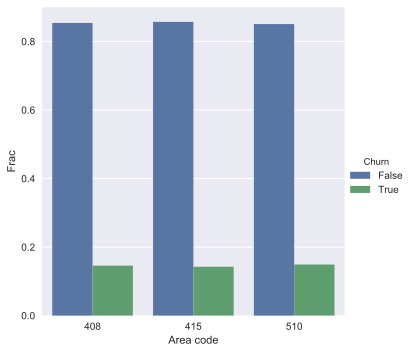

In [39]:
sns.factorplot(x='Area code', 
               y='Frac',
               hue='Churn', 
               data=X, 
               kind='bar', 
               size = 5)

Скорее всего, признак Area code не будет влиять на целевую переменную


### Задание 5  
  
Вычислите тарифные планы (стоимость минуты разговора): day, eve, night, intl.  
Проверьте, различаются ли они для различных зон покрытия сети. 

In [40]:
telecom_data.head()

ID     Sex  Age State  Account length Area code          Plans  \
0  40075  Female  37   KS    128             415       Voice mail      
1  17475  Female  35   OH    107             415       Voice mail      
2  62242  Female  19   NJ    137             415       None            
3  81231  Female  31   OH    84              408       International   
4  78542  Female  30   OK    75              415       International   

   Number vmail messages  Total day minutes  Total day calls  \
0  25                     265.1              110.0             
1  26                     161.6              123.0             
2  0                      243.4              114.0             
3  0                      299.4              71.0              
4  0                      166.7              113.0             

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0  45.07             197.4              99.0             16.78              
1  27.47             195.5              103.0            16.62              
2  41.38             121.2              110.0            10.30              
3  50.90             61.9               88.0             5.26               
4  28.34             148.3              122.0            12.61              

   Total night minutes  Total night calls  Total night charge  \
0  244.7                91.0               11.01                
1  254.4                103.0              11.45                
2  162.6                104.0              7.32                 
3  196.9                89.0               8.86                 
4  186.9                121.0              8.41                 

   Total intl minutes  Total intl calls  Total intl charge  Total charge  \
0  10.0                3.0               2.70               75.56          
1  13.7                3.0               3.70               59.24          
2  12.2                5.0               3.29               62.29          
3  6.6                 7.0               1.78               66.80          
4  10.1                3.0               2.73               52.09          

   Customer service calls  Churn  
0  1                       False  
1  1                       False  
2  0                       False  
3  2                       False  
4  3                       False

In [41]:
x = telecom_data['Total day charge']
y = telecom_data['Total day minutes']
telecom_data['Day tariff'] = x.div(y)

In [42]:
x = telecom_data['Total eve charge']
y = telecom_data['Total eve minutes']
telecom_data['Eve tariff'] = x.div(y)

In [43]:
x = telecom_data['Total night charge']
y = telecom_data['Total night minutes']
telecom_data['Night tariff'] = x.div(y)

In [44]:
x = telecom_data['Total intl charge']
y = telecom_data['Total intl minutes']
telecom_data['Intl tariff'] = x.div(y)

In [45]:
telecom_data.head(5)

ID     Sex  Age State  Account length Area code          Plans  \
0  40075  Female  37   KS    128             415       Voice mail      
1  17475  Female  35   OH    107             415       Voice mail      
2  62242  Female  19   NJ    137             415       None            
3  81231  Female  31   OH    84              408       International   
4  78542  Female  30   OK    75              415       International   

   Number vmail messages  Total day minutes  Total day calls  \
0  25                     265.1              110.0             
1  26                     161.6              123.0             
2  0                      243.4              114.0             
3  0                      299.4              71.0              
4  0                      166.7              113.0             

   Total day charge  Total eve minutes     ...       Total night calls  \
0  45.07             197.4                 ...       91.0                
1  27.47             195.5                 ...       103.0               
2  41.38             121.2                 ...       104.0               
3  50.90             61.9                  ...       89.0                
4  28.34             148.3                 ...       121.0               

   Total night charge  Total intl minutes  Total intl calls  \
0  11.01               10.0                3.0                
1  11.45               13.7                3.0                
2  7.32                12.2                5.0                
3  8.86                6.6                 7.0                
4  8.41                10.1                3.0                

   Total intl charge  Total charge  Customer service calls  Churn  Day tariff  \
0  2.70               75.56         1                       False  0.170011     
1  3.70               59.24         1                       False  0.169988     
2  3.29               62.29         0                       False  0.170008     
3  1.78               66.80         2                       False  0.170007     
4  2.73               52.09         3                       False  0.170006     

   Eve tariff  Night tariff  Intl tariff  
0  0.085005    0.044994      0.270000     
1  0.085013    0.045008      0.270073     
2  0.084983    0.045018      0.269672     
3  0.084976    0.044997      0.269697     
4  0.085030    0.044997      0.270297     

[5 rows x 27 columns]

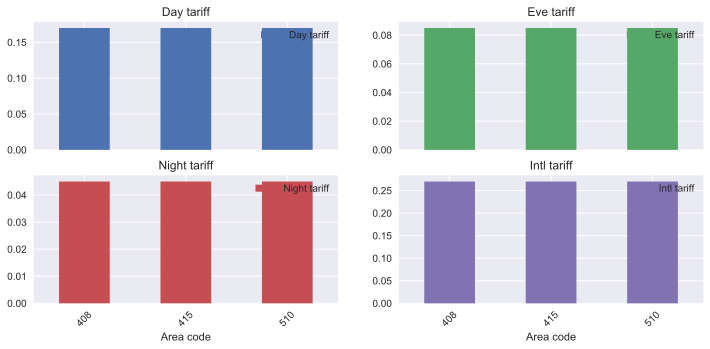

In [46]:
telecom_data[[x for x in telecom_data.columns if 'tariff' in x] + ['Area code']].groupby('Area code').mean().plot(subplots=True, 
                                                                                    layout=(3, 2), 
                                                                                   kind='bar', 
                                                                                    rot = 45,
                                                                                    figsize=(12,8))
plt.show()

In [47]:
telecom_data.pivot_table(['Day tariff', 'Eve tariff', 'Night tariff', 'Intl tariff'], 
['Area code'], aggfunc='mean').head(10)

Day tariff  Eve tariff  Intl tariff  Night tariff
Area code                                                   
408        0.170003    0.085001    0.270071     0.045       
415        0.170004    0.085001    0.270056     0.045       
510        0.170003    0.085002    0.270043     0.045

Тарифные планы почти не различаются между зонами

In [48]:
telecom_data.pivot_table(['Day tariff', 'Eve tariff', 'Night tariff', 'Intl tariff'], 
['Churn'], aggfunc='mean').head(10)

Day tariff  Eve tariff  Intl tariff  Night tariff
Churn                                                   
False  0.170003    0.085001    0.270057     0.045       
True   0.170003    0.085001    0.270053     0.045

Отток клиентов не зависит от тарифного плана - удалим эти признаки

In [49]:
telecom_data = telecom_data.drop(['Day tariff', 'Eve tariff', 'Night tariff', 'Intl tariff'], axis=1) 

### Задание 6  
  
По каждому штату и каждому плану в признаке `Plans` (International и Voice mail) вычислите количество клиентов, подключивших этот план и их долю внутри штата. Пример вывода:
  
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>State</th>
      <th>Plan</th>
      <th>Count</th>
      <th>Frac</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>state_1</td>
      <td>International</td>
      <td>40</td>
      <td>0.4</td>
    </tr>
    <tr>
      <th>1</th>
      <td>state_1</td>
      <td>Voice mail</td>
      <td>30</td>
      <td>0.3</td>
    </tr>
    <tr>
      <th>2</th>
      <td>state_2</td>
      <td>International</td>
      <td>25</td>
      <td>0.5</td>
    </tr>
    <tr>
      <th>3</th>
      <td>state_2</td>
      <td>Voice mail</td>
      <td>35</td>
      <td>0.7</td>
    </tr>
  </tbody>
</table>

Сначала разделим наблюдения, включающие сразу два значения по признаку Plans: 'International, Voice mail' 

In [50]:
dupl_indexes = [] # сохраним индексы этих наблюдений
for index, row in telecom_data.iterrows():
    row_values = row['Plans'].split(', ')
    if(len(row_values)>1):
        dupl_indexes.append(index)
        new_row = row.copy()
        telecom_data.loc[index, 'Plans'] = row_values[0]
        new_row.loc['Plans'] = row_values[1]
        telecom_data = telecom_data.append(new_row)

In [51]:
telecom_data = telecom_data.sort_index(axis='index')

In [52]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3325 entries, 0 to 3332
Data columns (total 23 columns):
ID                        3325 non-null int64
Sex                       3325 non-null object
Age                       3325 non-null int64
State                     3325 non-null object
Account length            3325 non-null int64
Area code                 3325 non-null object
Plans                     3325 non-null object
Number vmail messages     3325 non-null int64
Total day minutes         3325 non-null float64
Total day calls           3325 non-null float64
Total day charge          3325 non-null float64
Total eve minutes         3325 non-null float64
Total eve calls           3325 non-null float64
Total eve charge          3325 non-null float64
Total night minutes       3325 non-null float64
Total night calls         3325 non-null float64
Total night charge        3325 non-null float64
Total intl minutes        3325 non-null float64
Total intl calls          3325 non-null f

In [53]:
telecom_data.head(15)

ID     Sex  Age State  Account length Area code          Plans  \
0   40075  Female  37   KS    128             415       Voice mail      
1   17475  Female  35   OH    107             415       Voice mail      
2   62242  Female  19   NJ    137             415       None            
3   81231  Female  31   OH    84              408       International   
4   78542  Female  30   OK    75              415       International   
5   87274  Male    35   AL    118             510       International   
6   12533  Male    44   MA    121             510       Voice mail      
7   47149  Female  29   MO    147             415       International   
8   88008  Female  35   LA    117             408       None            
9   68141  Female  35   WV    141             415       Voice mail      
9   68141  Female  35   WV    141             415       International   
10  92481  Female  35   IN    65              415       None            
11  17134  Female  41   RI    74              415       None            
12  23212  Male    31   IA    168             408       None            
15  66612  Male    25   NY    161             415       None            

    Number vmail messages  Total day minutes  Total day calls  \
0   25                     265.10             110.0             
1   26                     161.60             123.0             
2   0                      243.40             114.0             
3   0                      299.40             71.0              
4   0                      166.70             113.0             
5   0                      223.40             98.0              
6   24                     218.20             88.0              
7   0                      157.00             79.0              
8   0                      184.50             97.0              
9   37                     258.60             84.0              
9   37                     258.60             84.0              
10  0                      129.10             137.0             
11  0                      187.70             127.0             
12  0                      128.80             96.0              
15  0                      499.35             100.5             

    Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0   45.07             197.4              99.0             16.78              
1   27.47             195.5              103.0            16.62              
2   41.38             121.2              110.0            10.30              
3   50.90             61.9               88.0             5.26               
4   28.34             148.3              122.0            12.61              
5   37.98             220.6              101.0            18.75              
6   37.09             348.5              108.0            29.62              
7   26.69             103.1              94.0             8.76               
8   31.37             351.6              80.0             29.89              
9   43.96             222.0              111.0            18.87              
9   43.96             222.0              111.0            18.87              
10  21.95             228.5              83.0             19.42              
11  31.91             163.4              148.0            13.89              
12  21.90             104.9              71.0             8.92               
15  84.88             476.7              145.5            40.52              

    Total night minutes  Total night calls  Total night charge  \
0   244.7                91.0               11.01                
1   254.4                103.0              11.45                
2   162.6                104.0              7.32                 
3   196.9                89.0               8.86                 
4   186.9                121.0              8.41                 
5   203.9                118.0              9.18                 
6   212.6                118.0              9.57                 
7   211.8           

In [54]:
telecom_plans = telecom_data.loc[telecom_data['Plans'] != 'None']

In [55]:
t_plans = telecom_plans[['State', 'Plans', 'ID']].groupby(['State', 'Plans']).count()

In [56]:
t_plans.head()

ID
State Plans            
AK    International  4 
      Voice mail     16
AL    International  8 
      Voice mail     21
AR    International  8

In [57]:
dict = dict.fromkeys(['State', 'Plan', 'Count'])
states = []
plans = []
count = []
for index, value in t_plans['ID'].items():
    #print(index[0], index[1], value)
    states.append(index[0])
    plans.append(index[1])
    count.append(value)
dict['State'] = states
dict['Plan'] = plans
dict['Count'] = count  

In [58]:
X = pd.DataFrame(dict)
X.head(6)

State           Plan  Count
0  AK    International  4    
1  AK    Voice mail     16   
2  AL    International  8    
3  AL    Voice mail     21   
4  AR    International  8    
5  AR    Voice mail     14

In [59]:
x = X.groupby('State')['Count'].transform('sum')
x.head(6)

0    20
1    20
2    29
3    29
4    22
5    22
Name: Count, dtype: int64

In [60]:
X['Frac'] = np.round(X.Count.div(x), 1)
X.head(6)

State           Plan  Count  Frac
0  AK    International  4      0.2 
1  AK    Voice mail     16     0.8 
2  AL    International  8      0.3 
3  AL    Voice mail     21     0.7 
4  AR    International  8      0.4 
5  AR    Voice mail     14     0.6

Можно заметить, что голосовую почту клиенты подключают чаще, чем международный тариф

In [61]:
del x, X, t_plans, telecom_plans

### Задание 7  
  
Для нечисловых признаков выполните преобразование к числовому виду. Обоснуйте выбранное преобразование для каждого признака. 

In [62]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3325 entries, 0 to 3332
Data columns (total 23 columns):
ID                        3325 non-null int64
Sex                       3325 non-null object
Age                       3325 non-null int64
State                     3325 non-null object
Account length            3325 non-null int64
Area code                 3325 non-null object
Plans                     3325 non-null object
Number vmail messages     3325 non-null int64
Total day minutes         3325 non-null float64
Total day calls           3325 non-null float64
Total day charge          3325 non-null float64
Total eve minutes         3325 non-null float64
Total eve calls           3325 non-null float64
Total eve charge          3325 non-null float64
Total night minutes       3325 non-null float64
Total night calls         3325 non-null float64
Total night charge        3325 non-null float64
Total intl minutes        3325 non-null float64
Total intl calls          3325 non-null f

In [63]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Пол - бинарный признак, приведем его к числовому виду с помощью OrdinalEncoder

In [64]:
sex_enc = OrdinalEncoder()

telecom_data['Sex'] = sex_enc.fit_transform(telecom_data[['Sex']])

Для целевой переменной Churn можно использовать LabelEncoder

In [65]:
churn_enc = LabelEncoder()

telecom_data['Churn'] = churn_enc.fit_transform(telecom_data['Churn'])

In [66]:
telecom_data.head()

ID  Sex  Age State  Account length Area code          Plans  \
0  40075  0.0  37   KS    128             415       Voice mail      
1  17475  0.0  35   OH    107             415       Voice mail      
2  62242  0.0  19   NJ    137             415       None            
3  81231  0.0  31   OH    84              408       International   
4  78542  0.0  30   OK    75              415       International   

   Number vmail messages  Total day minutes  Total day calls  \
0  25                     265.1              110.0             
1  26                     161.6              123.0             
2  0                      243.4              114.0             
3  0                      299.4              71.0              
4  0                      166.7              113.0             

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0  45.07             197.4              99.0             16.78              
1  27.47             195.5              103.0            16.62              
2  41.38             121.2              110.0            10.30              
3  50.90             61.9               88.0             5.26               
4  28.34             148.3              122.0            12.61              

   Total night minutes  Total night calls  Total night charge  \
0  244.7                91.0               11.01                
1  254.4                103.0              11.45                
2  162.6                104.0              7.32                 
3  196.9                89.0               8.86                 
4  186.9                121.0              8.41                 

   Total intl minutes  Total intl calls  Total intl charge  Total charge  \
0  10.0                3.0               2.70               75.56          
1  13.7                3.0               3.70               59.24          
2  12.2                5.0               3.29               62.29          
3  6.6                 7.0               1.78               66.80          
4  10.1                3.0               2.73               52.09          

   Customer service calls  Churn  
0  1                       0      
1  1                       0      
2  0                       0      
3  2                       0      
4  3                       0

In [67]:
telecom_data = telecom_data.rename(columns={'Sex': 'is_male'})

In [68]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3325 entries, 0 to 3332
Data columns (total 23 columns):
ID                        3325 non-null int64
is_male                   3325 non-null float64
Age                       3325 non-null int64
State                     3325 non-null object
Account length            3325 non-null int64
Area code                 3325 non-null object
Plans                     3325 non-null object
Number vmail messages     3325 non-null int64
Total day minutes         3325 non-null float64
Total day calls           3325 non-null float64
Total day charge          3325 non-null float64
Total eve minutes         3325 non-null float64
Total eve calls           3325 non-null float64
Total eve charge          3325 non-null float64
Total night minutes       3325 non-null float64
Total night calls         3325 non-null float64
Total night charge        3325 non-null float64
Total intl minutes        3325 non-null float64
Total intl calls          3325 non-null 

Признаки Area code и Plans содержат более двух значений - применим OneHotEncoder

In [69]:
ct = ColumnTransformer(
    [
        ('Area code', OneHotEncoder(sparse=False, categories='auto'), ['Area code']),
        ('Plans', OneHotEncoder(sparse=False, categories='auto'), ['Plans'])
    ],
    remainder='drop'
)
ct.fit(telecom_data)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('Area code', OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False), ['Area code']), ('Plans', OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=False), ['Plans'])])

In [70]:
X = pd.DataFrame(ct.transform(telecom_data), index=telecom_data.index,
                 columns=[x.replace('_x0', '') for x in ct.get_feature_names()])
X.head(15)

Area code__408  Area code__415  Area code__510  Plans__International  \
0   0.0             1.0             0.0             0.0                    
1   0.0             1.0             0.0             0.0                    
2   0.0             1.0             0.0             0.0                    
3   1.0             0.0             0.0             1.0                    
4   0.0             1.0             0.0             1.0                    
5   0.0             0.0             1.0             1.0                    
6   0.0             0.0             1.0             0.0                    
7   0.0             1.0             0.0             1.0                    
8   1.0             0.0             0.0             0.0                    
9   0.0             1.0             0.0             0.0                    
9   0.0             1.0             0.0             1.0                    
10  0.0             1.0             0.0             0.0                    
11  0.0             1.0             0.0             0.0                    
12  1.0             0.0             0.0             0.0                    
15  0.0             1.0             0.0             0.0                    

    Plans__None  Plans__Voice mail  
0   0.0          1.0                
1   0.0          1.0                
2   1.0          0.0                
3   0.0          0.0                
4   0.0          0.0                
5   0.0          0.0                
6   0.0          1.0                
7   0.0          0.0                
8   1.0          0.0                
9   0.0          1.0                
9   0.0          0.0                
10  1.0          0.0                
11  1.0          0.0                
12  1.0          0.0                
15  1.0          0.0

In [71]:
# повторяющиеся строки нужно объединить обратно в одну
for index, row in X.loc[dupl_indexes].iterrows():
    if row['Plans__International'] == 0.0:
        X['Plans__International'].set_value(index, 1.0)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [72]:
X.loc[dupl_indexes].head(6)

Area code__408  Area code__415  Area code__510  Plans__International  \
9   0.0             1.0             0.0             1.0                    
9   0.0             1.0             0.0             1.0                    
38  0.0             1.0             0.0             1.0                    
38  0.0             1.0             0.0             1.0                    
41  1.0             0.0             0.0             1.0                    
41  1.0             0.0             0.0             1.0                    

    Plans__None  Plans__Voice mail  
9   0.0          1.0                
9   0.0          0.0                
38  0.0          1.0                
38  0.0          0.0                
41  0.0          1.0                
41  0.0          0.0

В принципе признак Plans__None можно и удалить, т.к. он несет лишнюю информацию (значения 0 у двух других признаках говорят о том, что никакой из планов не подключен)

In [73]:
X.drop('Plans__None', axis=1, inplace=True)

In [74]:
telecom_data = telecom_data.join(X).drop_duplicates(subset='ID') # одинаковые строки удалим, оставив первую

In [75]:
telecom_data.drop(['Area code', 'Plans'], axis=1, inplace=True)

In [76]:
telecom_data.head(15)

ID  is_male  Age State  Account length  Number vmail messages  \
0   40075  0.0      37   KS    128             25                      
1   17475  0.0      35   OH    107             26                      
2   62242  0.0      19   NJ    137             0                       
3   81231  0.0      31   OH    84              0                       
4   78542  0.0      30   OK    75              0                       
5   87274  1.0      35   AL    118             0                       
6   12533  1.0      44   MA    121             24                      
7   47149  0.0      29   MO    147             0                       
8   88008  0.0      35   LA    117             0                       
9   68141  0.0      35   WV    141             37                      
10  92481  0.0      35   IN    65              0                       
11  17134  0.0      41   RI    74              0                       
12  23212  1.0      31   IA    168             0                       
15  66612  1.0      25   NY    161             0                       
16  22311  1.0      45   ID    85              27                      

    Total day minutes  Total day calls  Total day charge  Total eve minutes  \
0   265.10             110.0            45.07             197.4               
1   161.60             123.0            27.47             195.5               
2   243.40             114.0            41.38             121.2               
3   299.40             71.0             50.90             61.9                
4   166.70             113.0            28.34             148.3               
5   223.40             98.0             37.98             220.6               
6   218.20             88.0             37.09             348.5               
7   157.00             79.0             26.69             103.1               
8   184.50             97.0             31.37             351.6               
9   258.60             84.0             43.96             222.0               
10  129.10             137.0            21.95             228.5               
11  187.70             127.0            31.91             163.4               
12  128.80             96.0             21.90             104.9               
15  499.35             100.5            84.88             476.7               
16  196.40             139.0            33.39             280.9               

    Total eve calls  Total eve charge        ...          Total night charge  \
0   99.0             16.78                   ...          11.01                
1   103.0            16.62                   ...          11.45                
2   110.0            10.30                   ...          7.32                 
3   88.0             5.26                    ...          8.86                 
4   122.0            12.61                   ...          8.41                 
5   101.0            18.75                   ...          9.18                 
6   108.0            29.62                   ...          9.57                 
7   94.0             8.76                    ...          9.53                 
8   80.0             29.89                   ...          9.71                 
9   111.0            18.87                   ...          14.69                
10  83.0             19.42                   ...          9.40                 
11  148.0            13.89                   ...          8.82                 
12  71.0             8.92                    ...          6.35                 
15  145.5            40.52                   ...          10.84                
16  90.0             23.88                   ...          4.02                 

    Total intl minutes  Total intl calls  Total intl charge  Total charge  \
0   10.0                3.0               2.70               75.56          
1   13.7                3.0               3.70               59.24          
2   12.2                5.0               3.29               62.29          


In [77]:
del X

Сохраним признак State отдельно, а из датасета удалим

In [78]:
states = telecom_data['State']
telecom_data.drop('State', axis=1, inplace=True)

### Задание 8  
  
Сколько линейно-зависимых признаков присуствует в данных?  
Определите и удалите признаки, которые линейно зависят от остальных.

In [79]:
from numpy.linalg import matrix_rank

In [80]:
matrix = telecom_data.drop(['ID', 'Churn'], axis=1)

In [81]:
matrix.head()

is_male  Age  Account length  Number vmail messages  Total day minutes  \
0  0.0      37   128             25                     265.1               
1  0.0      35   107             26                     161.6               
2  0.0      19   137             0                      243.4               
3  0.0      31   84              0                      299.4               
4  0.0      30   75              0                      166.7               

   Total day calls  Total day charge  Total eve minutes  Total eve calls  \
0  110.0            45.07             197.4              99.0              
1  123.0            27.47             195.5              103.0             
2  114.0            41.38             121.2              110.0             
3  71.0             50.90             61.9               88.0              
4  113.0            28.34             148.3              122.0             

   Total eve charge  Total night minutes  Total night calls  \
0  16.78             244.7                91.0                
1  16.62             254.4                103.0               
2  10.30             162.6                104.0               
3  5.26              196.9                89.0                
4  12.61             186.9                121.0               

   Total night charge  Total intl minutes  Total intl calls  \
0  11.01               10.0                3.0                
1  11.45               13.7                3.0                
2  7.32                12.2                5.0                
3  8.86                6.6                 7.0                
4  8.41                10.1                3.0                

   Total intl charge  Total charge  Customer service calls  Area code__408  \
0  2.70               75.56         1                       0.0              
1  3.70               59.24         1                       0.0              
2  3.29               62.29         0                       0.0              
3  1.78               66.80         2                       1.0              
4  2.73               52.09         3                       0.0              

   Area code__415  Area code__510  Plans__International  Plans__Voice mail  
0  1.0             0.0             0.0                   1.0                
1  1.0             0.0             0.0                   1.0                
2  1.0             0.0             0.0                   0.0                
3  0.0             0.0             1.0                   0.0                
4  1.0             0.0             1.0                   0.0

In [82]:
matrix_rank(matrix.values)

22

In [83]:
len(matrix.columns)

23

Где-то есть зависимые столбцы, проверим парные зависимости между признаками

In [84]:
columns = ['Total day minutes', 
           'Total day calls', 
           'Total day charge',  
           'Total charge']
sns.pairplot(telecom_data[columns])

Общая сумма оплаты за услуги днем линейно зависит от общей длительности разговоров днем. Кроме того, общая сумма оплаты по большей части зависит от общей суммы оплаты услуг днем, т.к. на дневное время приходится большая часть звонков. Аналогичная ситуация для разговоров в вечернее и ночное время и для международных звонков, но графики тяжелые 

In [85]:
#columns = ['Total eve minutes', 
#           'Total eve calls',
#           'Total eve charge', 
#           'Total charge']
#sns.pairplot(telecom_data[columns])

In [86]:
#columns = ['Total night minutes', 
#           'Total night calls', 
#           'Total night charge', 
#           'Total charge']
#sns.pairplot(telecom_data[columns])

In [87]:
#columns = ['Total intl minutes', 
#           'Total intl calls', 
#           'Total intl charge', 
#           'Total charge']
#sns.pairplot(telecom_data[columns])

### Задание 9  
  
Проведите анализ зависимости признаков.  
Для числовых признаков вычислите корреляции друг с другом и с целевой переменной `Churn`. Постройте heatmap.  
Для категориальных признаков оцените их связь с целевой переменной, постройте графики.  
  
Сделайте выводы по результатм анализа. Можно ли избавиться от некоторых признаков? Если да, то от каких и почему?

In [88]:
cols = telecom_data.columns.tolist()[1:20]
cols 

['is_male',
 'Age',
 'Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Total charge',
 'Customer service calls',
 'Churn']

In [89]:
corr_mat = telecom_data[cols].corr()

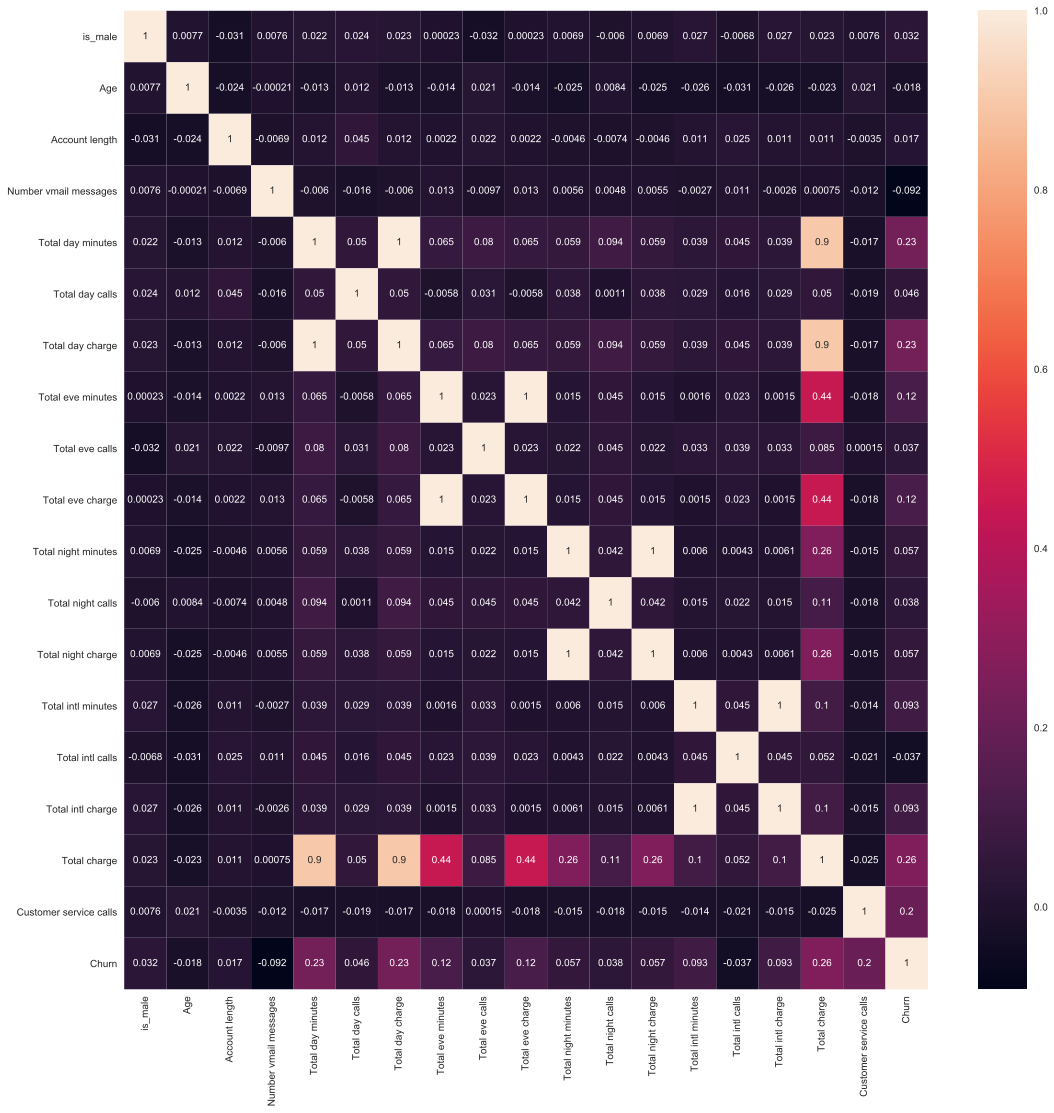

In [90]:
plt.figure(figsize=(18,18))
sns.heatmap(corr_mat, annot=True)

plt.show()

Total day charge зависит от Total day minutes, и вместе они оказывают влияние на Total charge. Удалим эти признаки, оставим только Total charge

In [91]:
telecom_data.drop([
                   'Total day charge', 
                   'Total eve charge', 
                   'Total night charge', 
                   'Total intl charge',
                   'Total day minutes', 
                   'Total eve minutes', 
                   'Total night minutes', 
                   'Total intl minutes'], axis=1, inplace=True)

In [92]:
cols = telecom_data.columns.tolist()[1:12]
corr_mat = telecom_data[cols].corr()
cols

['is_male',
 'Age',
 'Account length',
 'Number vmail messages',
 'Total day calls',
 'Total eve calls',
 'Total night calls',
 'Total intl calls',
 'Total charge',
 'Customer service calls',
 'Churn']

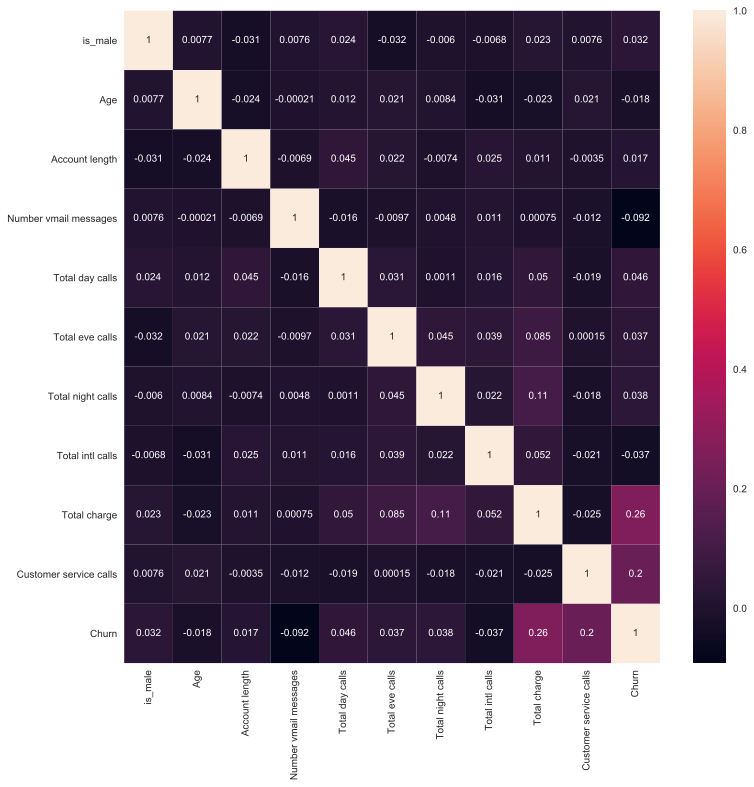

In [93]:
plt.figure(figsize=(12,12))
sns.heatmap(corr_mat, annot=True)

plt.show()

In [94]:
telecom_data[[x for x in telecom_data.columns if 'Area code' in x] + ['Churn']].groupby('Churn').mean()

Area code__408  Area code__415  Area code__510
Churn                                                
0      0.252533        0.495658        0.251809      
1      0.253731        0.486141        0.260128

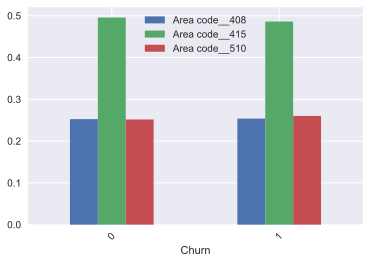

In [95]:
telecom_data[[x for x in telecom_data.columns if 'Area code' in x] + ['Churn']].groupby('Churn').mean().plot(kind='bar', rot=45)
plt.show()

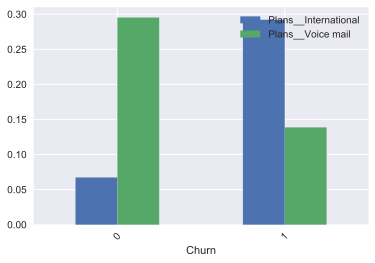

In [96]:
telecom_data[[x for x in telecom_data.columns if 'Plans' in x] + ['Churn']].groupby('Churn').mean().plot(kind='bar', rot=45)
plt.show()

Зоны покрытия одинаково распределены по классам, а вот планы отличаются

In [97]:
telecom_data['State'] = states

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


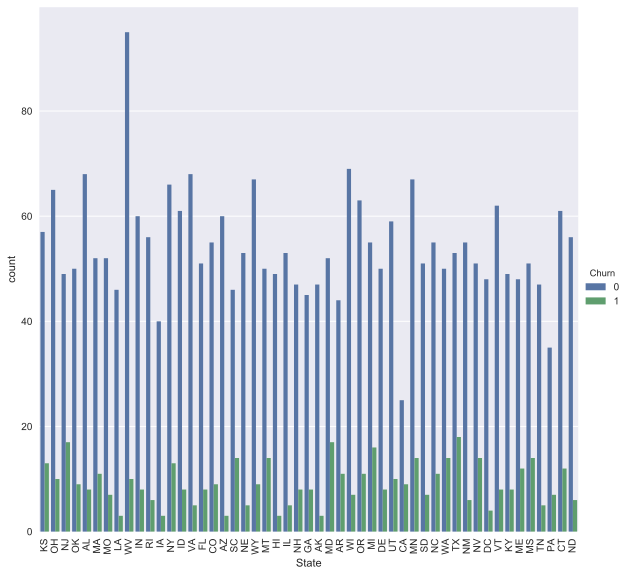

In [98]:
plt.figure(figsize=(12,9))
sns.factorplot(x='State', hue='Churn', data=telecom_data, kind='count', size = 8).set_xticklabels(rotation=90)
plt.show()

Распределение по классам среди штатов имеет не слишком большой разброс, поэтому штаты учитывать не будем

In [99]:
telecom_data.drop(['State'] + [x for x in telecom_data.columns if 'Area code' in x], axis=1, inplace=True)

In [100]:
del states

In [101]:
telecom_data.head()

ID  is_male  Age  Account length  Number vmail messages  \
0  40075  0.0      37   128             25                      
1  17475  0.0      35   107             26                      
2  62242  0.0      19   137             0                       
3  81231  0.0      31   84              0                       
4  78542  0.0      30   75              0                       

   Total day calls  Total eve calls  Total night calls  Total intl calls  \
0  110.0            99.0             91.0               3.0                
1  123.0            103.0            103.0              3.0                
2  114.0            110.0            104.0              5.0                
3  71.0             88.0             89.0               7.0                
4  113.0            122.0            121.0              3.0                

   Total charge  Customer service calls  Churn  Plans__International  \
0  75.56         1                       0      0.0                    
1  59.24         1                       0      0.0                    
2  62.29         0                       0      0.0                    
3  66.80         2                       0      1.0                    
4  52.09         3                       0      1.0                    

   Plans__Voice mail  
0  1.0                
1  1.0                
2  0.0                
3  0.0                
4  0.0

### Задание 10  
  
Рассмотрим основанную на правилах модель для предсказания оттока клиентов: 
* Если у пользователя подключен роуминг (International plan) & клиент звонил в тех. поддержку более 3-х раз => клиент уйдет (Churn = True)
* Иначе => клиент останется (Churn = False)  
  
  
Оцените качество данной модели на 5-fold валидации из 5 повторений. Для оценки качества рассмотрите различные метрики: F1-score, precision, recall, accuracy, balanced accuracy. Дайте комментарий к оценке.

In [102]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics

In [103]:
telecom_data['Many_service_calls'] = (telecom_data['Customer service calls'] > 3).astype('int64')

pd.crosstab((telecom_data['Plans__International'] == 1.0) & 
            (telecom_data['Many_service_calls'] == 1), 
            telecom_data['Churn'], margins=True)

Churn     0    1   All
row_0                 
False  2755  450  3205
True   9     19   28  
All    2764  469  3233

In [104]:
telecom_data['Churn_predict'] = ((telecom_data['Plans__International'] == 1.0) & 
                                 (telecom_data['Many_service_calls'] == 1)).astype('int64')

In [105]:
true_label = telecom_data['Churn']
pred_label = telecom_data['Churn_predict']

In [106]:
Data = telecom_data.drop(['Churn', 'Churn_predict'], axis=1)

In [107]:
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

f1_scores = []
prec_scores = []
recall_scores = []
accuracy_scores = []
b_accuracy_scores = []

for train_index, test_index in rkf.split(Data, true_label):
    y_true = true_label.iloc[test_index]
    y_pred = pred_label.iloc[test_index]
    f1_scores.append(metrics.f1_score(y_true, y_pred))
    prec_scores.append(metrics.precision_score(y_true, y_pred))
    recall_scores.append(metrics.recall_score(y_true, y_pred))
    accuracy_scores.append(metrics.accuracy_score(y_true, y_pred))
    b_accuracy_scores.append(metrics.balanced_accuracy_score(y_true, y_pred))
    
f1_scores = pd.Series(f1_scores)
prec_scores = pd.Series(prec_scores)
recall_scores = pd.Series(recall_scores)
accuracy_scores = pd.Series(accuracy_scores)
b_accuracy_scores = pd.Series(b_accuracy_scores)

print('f1_score = %f \npresision = %f\nrecall = %f\naccuracy = %f\nbalanced_accuracy = %f' %
      (f1_scores.mean(), prec_scores.mean(), recall_scores.mean(), accuracy_scores.mean(), b_accuracy_scores.mean()))

f1_score = 0.076220 
presision = 0.685079
recall = 0.040531
accuracy = 0.858028
balanced_accuracy = 0.518638


Метрики вычислены для класса 1, то есть относительно ушедших клиентов. Среди всех клиентов, которых алгоритм определил как ушедших, только 69% расторгли договор с компанией на самом деле. Среди всех ушедших клиентов модель обнаружила только 4%. Таким образом, почти невозможно предсказать, почему клиент откажется от услуг компании. Несмотря на высокое значение accuracy, модель обладает низкой классифицирующей способностью, что связано с несбалансированностью классов в выборке

In [108]:
telecom_data.drop(['Churn_predict', 'Many_service_calls'], axis=1, inplace=True)

In [109]:
telecom_data.to_csv('new_telecom_churn.csv', index=False)

In [110]:
del telecom_data

## Часть 2. Методы машинного обучения <a id="part2"></a>

Продолжаем работать с данными по оттоку клиентов.  
Сформулируем задачу машинного обучения: необходимо построить модель, определяющую, останется клиент или уйдет. 
  
Для решения заданий, представленных ниже, необходимо использовать данные, полученные после выполнения всех преобразований в первой части. 

### Задание 1  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.  
* Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.  
* Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 

In [111]:
telecom_data = pd.read_csv('new_telecom_churn.csv', sep=',')
telecom_data.head()

ID  is_male  Age  Account length  Number vmail messages  \
0  40075  0.0      37   128             25                      
1  17475  0.0      35   107             26                      
2  62242  0.0      19   137             0                       
3  81231  0.0      31   84              0                       
4  78542  0.0      30   75              0                       

   Total day calls  Total eve calls  Total night calls  Total intl calls  \
0  110.0            99.0             91.0               3.0                
1  123.0            103.0            103.0              3.0                
2  114.0            110.0            104.0              5.0                
3  71.0             88.0             89.0               7.0                
4  113.0            122.0            121.0              3.0                

   Total charge  Customer service calls  Churn  Plans__International  \
0  75.56         1                       0      0.0                    
1  59.24         1                       0      0.0                    
2  62.29         0                       0      0.0                    
3  66.80         2                       0      1.0                    
4  52.09         3                       0      1.0                    

   Plans__Voice mail  
0  1.0                
1  1.0                
2  0.0                
3  0.0                
4  0.0

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [114]:
Data = telecom_data.drop(['ID', 'Churn'], axis=1)
label = telecom_data['Churn']

In [115]:
dtree_model = DecisionTreeClassifier(max_depth=5)

skf = StratifiedKFold(n_splits=5, shuffle=True)

scores = []
scores.extend(cross_val_score(dtree_model, Data, label, cv=skf, scoring='f1_micro'))

In [116]:
print('Mean score for DTree:', round(np.mean(scores), 5))

Mean score for DTree: 0.95979


In [117]:
import pickle

In [150]:
scores = []
i = 0

for train_index, test_index in skf.split(Data, label):
    trainData = Data.iloc[train_index]
    testData = Data.iloc[test_index]
    
    train_label = label.iloc[train_index]
    test_label = label.iloc[test_index]
    
    dtree_model = DecisionTreeClassifier(max_depth=5)
    dtree_model.fit(trainData, train_label)
    pred_label = dtree_model.predict(testData)
    
    scores.append(metrics.f1_score(test_label, pred_label, average='macro'))
    
    model_container = {
    'trainData': trainData,
    'train_label': train_label,
    'testData' : testData,
    'test_label': test_label,
    'dtree': dtree_model
    }
    
    model_name = 'task1_dtree%d.pkl' % i
    pickle.dump(model_container, open(model_name, 'wb'))
    
    i+=1

del trainData, testData, train_label, test_label

In [147]:
print('Mean score for DTree:', round(np.mean(scores), 5))

Mean score for DTree: 0.9156


In [151]:
model_container = pickle.load(open("task1_dtree1.pkl", 'rb'))  

In [153]:
trainData = model_container['trainData']
train_label = model_container['train_label']
testData = model_container['testData']
test_label = model_container['test_label']
model_1 = model_container['dtree']

In [154]:
pd.Series(model_1.feature_importances_, 
          index=Data.columns).sort_values(ascending=False)

Total charge              0.504056
Customer service calls    0.156431
Number vmail messages     0.146325
Plans__International      0.089387
Total intl calls          0.085359
Total day calls           0.006814
Account length            0.005495
Age                       0.003407
Total eve calls           0.002726
Plans__Voice mail         0.000000
Total night calls         0.000000
is_male                   0.000000
dtype: float64

In [155]:
import graphviz
from sklearn.tree import export_graphviz

In [156]:
dot_data = export_graphviz(model_1, 
                           out_file=None, 
                           feature_names=Data.columns, 
                           class_names=['0', '1'],
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

graph = graphviz.Source(dot_data) 
graph.render("dtree_model_1") 

'dtree_model_1.pdf'

Следующий код взят с сайта sklearn :)

In [157]:
n_nodes = model_1.tree_.node_count
children_left = model_1.tree_.children_left
children_right = model_1.tree_.children_right
feature = model_1.tree_.feature
threshold = model_1.tree_.threshold

In [158]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if %s <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 trainData.columns[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))
print()

The binary tree structure has 33 nodes and has the following tree structure:
node=0 test node: go to node 1 if Total charge <= 74.09500122070312 else to node 22.
	node=1 test node: go to node 2 if Customer service calls <= 3.5 else to node 15.
		node=2 test node: go to node 3 if Plans__International <= 0.5 else to node 10.
			node=3 test node: go to node 4 if Account length <= 223.0 else to node 7.
				node=4 test node: go to node 5 if Total charge <= 61.14500045776367 else to node 6.
					node=5 leaf node.
					node=6 leaf node.
				node=7 test node: go to node 8 if Total eve calls <= 86.0 else to node 9.
					node=8 leaf node.
					node=9 leaf node.
			node=10 test node: go to node 11 if Total intl calls <= 2.5 else to node 12.
				node=11 leaf node.
				node=12 test node: go to node 13 if Account length <= 81.5 else to node 14.
					node=13 leaf node.
					node=14 leaf node.
		node=15 test node: go to node 16 if Total charge <= 56.71000099182129 else to node 17.
			node=16 leaf node

In [159]:
node_indicator = model_1.decision_path(testData)

leave_id = model_1.apply(testData)

sample_id = 0 # будем смотреть первый объект тестовой выборки
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if (testData.iloc[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node %s : (%s (= %s) %s %s)"
          % (node_id,
             #sample_id,
             #feature[node_id],
             testData.columns[feature[node_id]],
             testData.iloc[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))



Rules used to predict sample 0: 
decision id node 0 : (Total charge (= 78.31) > 74.09500122070312)
decision id node 22 : (Number vmail messages (= 24) > 5.5)
decision id node 24 : (Plans__International (= 0.0) <= 0.5)
decision id node 25 : (Total charge (= 78.31) <= 111.2400016784668)


Если общая стоимость оплаченных услуг больше 74 денежных единиц, количество голосовых сообщений более 5, международный план не подключен, а общая стоимость услуг составила менее 111 денежных единиц, то клиент останется

In [160]:
# проверить первый объект тестовой выборки

In [161]:
testData.iloc[0]

is_male                   1.00  
Age                       44.00 
Account length            121.00
Number vmail messages     24.00 
Total day calls           88.00 
Total eve calls           108.00
Total night calls         118.00
Total intl calls          7.00  
Total charge              78.31 
Customer service calls    3.00  
Plans__International      0.00  
Plans__Voice mail         1.00  
Name: 6, dtype: float64

In [162]:
test_label.iloc[0]

0

### Задание 2  
  
На кросс-валидации (5-fold из 5 повторений) оцените, как меняется качество модели Random Forest с ростом числа деревьев (при дефолтных значениях остальных параметров). Провизуализируйте результаты. Сколько деревьев достаточно в данном случае и почему?  
**NB:** В сравнение включите конфигурацию, аналогичную простому дереву решений. 

In [176]:
import warnings
warnings.simplefilter('ignore')

In [177]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

In [189]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
rf_model = RandomForestClassifier()

In [190]:
rf_scores = cross_val_score(rf_model, Data, label, cv=rskf, scoring='f1_micro')
rf_scores = pd.Series(rf_scores)

In [191]:
print('Mean score for Random Forest:', round(np.mean(rf_scores), 5))

Mean score for Random Forest: 0.96022


In [196]:
scores = {1: [],
          2: [],
          5: [],
          10: [],
          50: [],
          100: [],
          150: [],
          200: [],
          300: [],
          400: [],
          500: []}

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

for x in scores:
    if x == 1:
        bootstrap = False
    else:
        bootstrap = True
            
    rf_model = RandomForestClassifier(n_estimators=x, bootstrap=bootstrap)
    scores[x] = cross_val_score(rf_model, Data, label, cv=rskf, scoring='f1_micro')
    
scores = pd.DataFrame(scores)
scores.columns = [str(x) for x in scores.columns]

In [197]:
scores.describe()

1          2          5         10         50        100  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean   0.919020   0.934307   0.955272   0.959791   0.963937   0.963565    
std    0.010639   0.010527   0.008461   0.006334   0.007571   0.004800    
min    0.894574   0.913447   0.933333   0.947450   0.947450   0.953632    
25%    0.913447   0.928903   0.952087   0.953488   0.958269   0.959815    
50%    0.916279   0.935085   0.956723   0.961240   0.964451   0.964451    
75%    0.924031   0.942813   0.959815   0.964451   0.968992   0.967543    
max    0.939722   0.951938   0.972179   0.969088   0.975270   0.970634    

             150        200        300        400        500  
count  25.000000  25.000000  25.000000  25.000000  25.000000  
mean   0.964057   0.964308   0.964245   0.964122   0.964245   
std    0.003981   0.006774   0.005242   0.006501   0.006230   
min    0.956723   0.952087   0.952087   0.952087   0.947450   
25%    0.961360   0.961360   0.962791   0.958269   0.961360   
50%    0.964451   0.964341   0.964451   0.964451   0.965997   
75%    0.967442   0.969088   0.967543   0.967442   0.967543   
max    0.973725   0.978295   0.972179   0.978362   0.975270

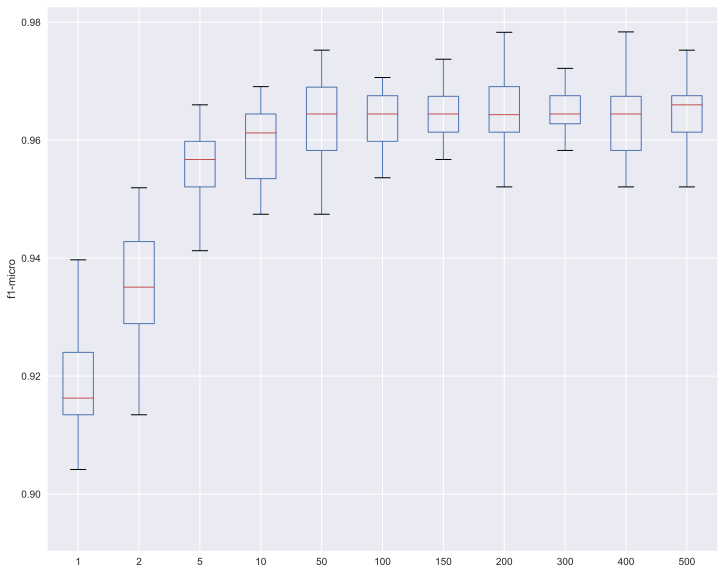

In [198]:
style.use('seaborn')
scores.boxplot(figsize=(12,10))
plt.ylabel('f1-micro')
plt.show()

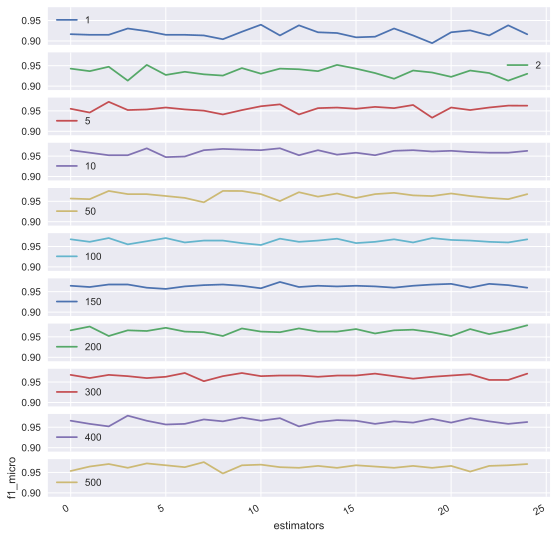

In [199]:
scores.plot(subplots=True, sharey=True, figsize=(9, 10))
plt.xlabel('estimators')
plt.ylabel('f1_micro')
plt.show()

Качество модели растет с увеличением числа деревьев. Начиная со 150 деревьев, среднее значений качества перестает сильно меняться и разброс значений становится маленьким. В данном случае 150 деревьев будет достаточно, но лучше подобрать этот параметр на 5-Fold валидации

### Задание 3  
  
* Настройте гиперпараметры модели Random Forest на 5-fold валдиации из 5 повторений. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.
* Разделите данные на обучающую и тестовую выборки в пропорциях 70:30. Обучите Random Forest  с настроенными параметрами на обучающей выборке. На тестовой выборке оцените качество (F1-score) всего ансамбля и <u>каждого дерева отдельно</u>. Постройте график распределения качества деревьев в ансамбле и сравните результаты с качеством всего леса. Дайте комментарий.  
* Выведите важность признаков в Random Forest, сделайте выводы. 

In [245]:
from sklearn.model_selection import GridSearchCV

In [144]:
params = [
    {
        'n_estimators': [150, 200, 300],
        'max_depth': range(5, 11, 3),
        'min_samples_split': range(2, 11, 3),
        'min_samples_leaf': range(1, 11, 3),
        'max_features': range(2, 13, 3)
    }
]


In [145]:
rf_model = RandomForestClassifier()

skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

clf = GridSearchCV(rf_model, params, cv=skf, scoring='f1_micro', n_jobs=5, verbose=5)

In [146]:
%%time

clf.fit(Data, label)

Fitting 25 folds for each of 288 candidates, totalling 7200 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:   11.8s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   21.1s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:   37.5s
[Parallel(n_jobs=5)]: Done 278 tasks      | elapsed:   58.0s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  1.4min
[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed:  2.0min
[Parallel(n_jobs=5)]: Done 872 tasks      | elapsed:  2.7min
[Parallel(n_jobs=5)]: Done 1142 tasks      | elapsed:  3.7min
[Parallel(n_jobs=5)]: Done 1448 tasks      | elapsed:  4.9min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:  6.2min
[Parallel(n_jobs=5)]: Done 2168 tasks      | elapsed:  8.0min
[Parallel(n_jobs=5)]: Done 2582 tasks      | elapsed:  9.9min
[Parallel(n_jobs=5)]: Done 3032 tasks      | elapsed: 12.4min
[Parallel(n_jobs=5)]: Done 3518 tasks      | elapsed: 15.1min
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed: 17.1min
[P

Wall time: 35min 36s


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x000002150B7736A0>,
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid=[{'n_estimators': [150, 200, 300], 'max_depth': range(5, 11, 3), 'min_samples_split': range(2, 11, 3), 'min_samples_leaf': range(1, 11, 3), 'max_features': range(2, 13, 3)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=5)

In [147]:
clf.best_score_

0.964553046705846

In [148]:
clf.best_params_

{'max_depth': 8,
 'max_features': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 150}

In [152]:
params = [
    {
        'n_estimators': [130, 150, 180],
        'max_depth': range(7, 10, 1),
        'min_samples_split': [2,3],
        'min_samples_leaf': range(2, 7, 1),
        'max_features': range(3, 8, 1)
    }
]


In [153]:
rf_model = RandomForestClassifier()

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

clf = GridSearchCV(rf_model, params, cv=rskf, scoring='f1_micro', n_jobs=5, verbose=5)

In [154]:
%%time

clf.fit(Data, label)

Fitting 25 folds for each of 450 candidates, totalling 11250 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    9.5s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   24.8s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:   52.7s
[Parallel(n_jobs=5)]: Done 278 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  2.3min
[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed:  3.2min
[Parallel(n_jobs=5)]: Done 872 tasks      | elapsed:  4.2min
[Parallel(n_jobs=5)]: Done 1142 tasks      | elapsed:  5.4min
[Parallel(n_jobs=5)]: Done 1448 tasks      | elapsed:  7.0min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:  8.3min
[Parallel(n_jobs=5)]: Done 2168 tasks      | elapsed:  9.5min
[Parallel(n_jobs=5)]: Done 2582 tasks      | elapsed: 11.0min
[Parallel(n_jobs=5)]: Done 3032 tasks      | elapsed: 12.6min
[Parallel(n_jobs=5)]: Done 3518 tasks      | elapsed: 14.6min
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed: 17.6min
[P

Wall time: 1h 3min 10s


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x000002150BCD1128>,
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid=[{'n_estimators': [130, 150, 180], 'max_depth': range(7, 10), 'min_samples_split': [2, 3], 'min_samples_leaf': range(2, 7), 'max_features': range(3, 8)}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=5)

In [155]:
clf.best_score_

0.9646767708011135

In [156]:
clf.best_params_

{'max_depth': 9,
 'max_features': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 150}

In [185]:
# установить параметры
rf_model = RandomForestClassifier(max_depth=9, max_features=5, min_samples_leaf=5, min_samples_split=3, n_estimators=150)

In [186]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
scores = pd.Series(cross_val_score(rf_model, Data, label, cv=rskf, n_jobs=5))

In [187]:
# качество всего ансамбля на кросс-валидации
print('Mean score for Random Forest:', round(scores.mean(), 5))

Mean score for Random Forest: 0.96437


*Проверим модель на обучающей и тестовой выборках*

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
(trainData, 
 testData, 
 train_label, 
 test_label) = train_test_split(Data,
                                label,
                                test_size=0.3, 
                                random_state=56428234)

In [202]:
print('Class distribution on train:',
      train_label.value_counts(normalize=True),
      '\nClass distribution on test:', 
      test_label.value_counts(normalize=True),
      sep='\n')

Class distribution on train:
0    0.856385
1    0.143615
Name: Churn, dtype: float64

Class distribution on test:
0    0.851546
1    0.148454
Name: Churn, dtype: float64


In [162]:
rf_model.fit(trainData, train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [204]:
pkl_filename = "task3_rf_model.pkl"  

In [164]:
with open(pkl_filename, 'wb') as file:  
    pickle.dump(rf_model, file)

In [165]:
del rf_model

In [205]:
with open(pkl_filename, 'rb') as file:  
    rf_model = pickle.load(file)

In [206]:
preds = rf_model.predict(trainData)

In [207]:
from plot_cm import plot_confusion_matrix

In [208]:
def get_model_quality(test_label, preds):
    print("Accuracy:",
      round(metrics.accuracy_score(test_label, preds), 5),
      '\nBalanced accuracy:',
      round(metrics.balanced_accuracy_score(test_label, preds), 5),
      '\nF1-score: ',
      round(metrics.f1_score(test_label, preds),5))

    print()
    print(metrics.classification_report(test_label, preds))

    plot_confusion_matrix(cm=metrics.confusion_matrix(test_label, preds),
                          target_names=['0', '1'],
                          normalize=True)

Accuracy: 0.96465 
Balanced accuracy: 0.97838 
F1-score:  0.86014

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2016
           1       0.76      1.00      0.86       247

   micro avg       0.96      0.96      0.96      2263
   macro avg       0.88      0.98      0.92      2263
weighted avg       0.97      0.96      0.97      2263



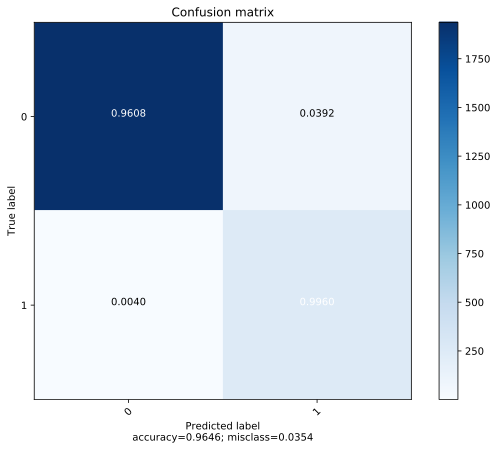

In [209]:
style.use('default')
get_model_quality(preds, train_label)

In [210]:
preds = rf_model.predict(testData)

Accuracy: 0.96392 
Balanced accuracy: 0.97967 
F1-score:  0.86166

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       861
           1       0.76      1.00      0.86       109

   micro avg       0.96      0.96      0.96       970
   macro avg       0.88      0.98      0.92       970
weighted avg       0.97      0.96      0.97       970



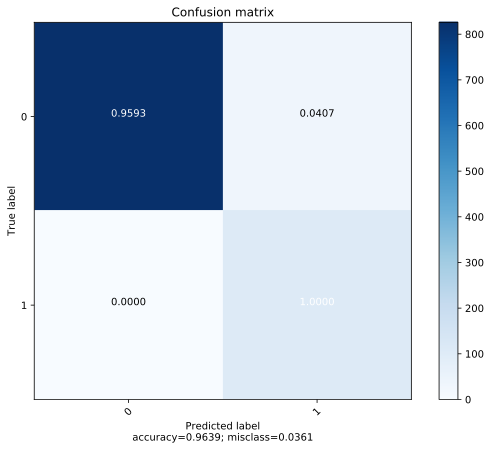

In [211]:
style.use('default')
get_model_quality(preds, test_label)

Модель показывает высокие результаты как на обучающей, так и на тестовой выборках. Кроме того, на тестовой выборке ансамбль нашел всех ушедших клиентов

In [212]:
# f1-score для всего ансамбля
print('Mean score for Random Forest on test set:', round(metrics.f1_score(test_label,preds), 5))

Mean score for Random Forest on test set: 0.86166


In [213]:
# f1-score для каждого дерева
scores = pd.Series(
    [
        metrics.f1_score(test_label,
                         x.predict(testData)) for x in rf_model.estimators_
    ]
)

In [214]:
scores.describe()

count    150.000000
mean     0.774200  
std      0.045456  
min      0.642276  
25%      0.749253  
50%      0.785045  
75%      0.802525  
max      0.857143  
dtype: float64

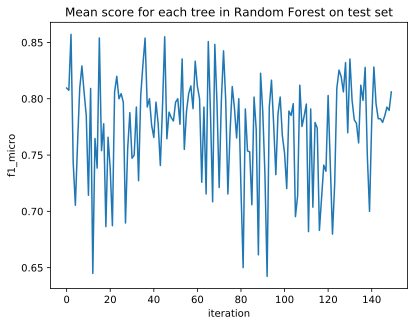

In [215]:
pd.Series(scores).plot()

plt.title('Mean score for each tree in Random Forest on test set')
plt.ylabel('f1_micro')
plt.xlabel('iteration')

plt.show()

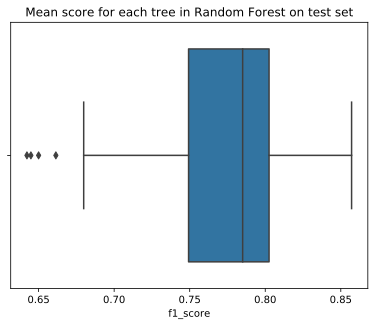

In [216]:
sns.boxplot(scores)
plt.title('Mean score for each tree in Random Forest on test set')
plt.xlabel('f1_score')
plt.show()

Видно, что каждое дерево в отдельности классифицирует данные хуже чем весь ансамбль, и разброс значений довольно большой

*Важность признаков*

In [217]:
pd.Series(rf_model.feature_importances_, 
          index=Data.columns).sort_values(ascending=False)

Total charge              0.481386
Customer service calls    0.154729
Plans__International      0.096447
Number vmail messages     0.056362
Total intl calls          0.056248
Plans__Voice mail         0.054015
Account length            0.024329
Total eve calls           0.021404
Total day calls           0.020172
Total night calls         0.019326
Age                       0.012323
is_male                   0.003259
dtype: float64

In [218]:
# дерево с самым лучшим качеством 
scores.argmax()

2

In [219]:
s = []
for d in rf_model.estimators_:
    s.append(pd.Series(d.feature_importances_, 
                       index=Data.columns))

In [220]:
s[2].sort_values(ascending=False)

Total charge              0.618053
Customer service calls    0.153938
Plans__International      0.086720
Total intl calls          0.071512
Plans__Voice mail         0.016634
Total eve calls           0.012984
Total day calls           0.012571
Total night calls         0.011415
Account length            0.010530
Age                       0.004940
Number vmail messages     0.000703
is_male                   0.000000
dtype: float64

Ранжирование признаков по важности немного отличается, а также отдельное дерево не учитывало пол в принятии решения

In [221]:
del rf_model

### Задание 4  
  
* Используйте логистическую регрессию для решения задачи, оцените качество (roc auc) на 5-fold валидации из 5 повторений. 
* Аналогично (на такой же валидации с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.
* Разделите данные на обучающую и тестовую выборки в пропорциях 70:30. На обучающей выборке обучите логистическую регрессию и Random Forest  с настроенными параметрами. Для обеих моделей оцените качество на тестовой выборке - постройте ROC-кривую, вычислите roc auc.

In [222]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, auc, roc_auc_score

In [223]:
logreg = LogisticRegression()

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

scores = []
scores.extend(cross_val_score(logreg, Data, label, cv=rskf, scoring='roc_auc'))

print('Mean score for Logistic Regression:', round(np.mean(scores), 5))

Mean score for Logistic Regression: 0.81283


In [224]:
rf_model = RandomForestClassifier(max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=200)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

scores = []
scores.extend(cross_val_score(rf_model, Data, label, cv=rskf, scoring='f1_micro'))

print('Mean score for Random Forest:', round(np.mean(scores), 5))

Mean score for Random Forest: 0.96449


Случайный лес показал более высокий результат

In [231]:
(trainData, 
 testData, 
 train_label, 
 test_label) = train_test_split(Data,
                                label,
                                test_size=0.3, 
                                random_state=56428234)

In [232]:
logreg = LogisticRegression()
logreg.fit(trainData, train_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [233]:
preds_prob = logreg.predict_proba(testData)[:,1]

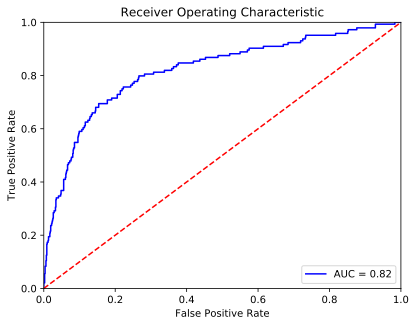

In [234]:
fpr, tpr, threshold = metrics.roc_curve(test_label, preds_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.title('Receiver Operating Characteristic')

plt.legend(loc = 'lower right')

plt.show()

In [235]:
rf_model = RandomForestClassifier(max_depth=8, max_features=5, min_samples_leaf=1, min_samples_split=8, n_estimators=200)
rf_model.fit(trainData, train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [236]:
preds_prob = rf_model.predict_proba(testData)[:,1]

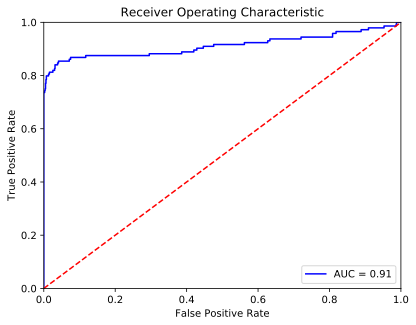

In [237]:
fpr, tpr, threshold = metrics.roc_curve(test_label, preds_prob)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.title('Receiver Operating Characteristic')

plt.legend(loc = 'lower right')

plt.show()

### Задание 5  
  
Настройте гиперпараметры модели SVM на 5-fold валидации из 5 повторений. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.    
Каково качество модели? Каков разброс значений метрики? Насколько сильно различие между лучшей и худшей конфигурациями параметров?

In [238]:
from sklearn.svm import SVC

Стандартизация данных

In [239]:
from sklearn import preprocessing

In [240]:
standardized_data = pd.DataFrame(data=preprocessing.scale(Data),columns=Data.columns)

In [241]:
standardized_data.head()

is_male       Age  Account length  Number vmail messages  Total day calls  \
0 -0.992297  0.410913  0.670112        1.204732               0.461771          
1 -0.992297  0.062778  0.144785        1.277086               1.106536          
2 -0.992297 -2.722301  0.895252       -0.604123               0.660160          
3 -0.992297 -0.633491 -0.430573       -0.604123              -1.472525          
4 -0.992297 -0.807559 -0.655713       -0.604123               0.610563          

   Total eve calls  Total night calls  Total intl calls  Total charge  \
0 -0.064265        -0.461420          -0.600014          1.390556       
1  0.132672         0.137204          -0.600014         -0.036941       
2  0.477313         0.187089           0.202819          0.229840       
3 -0.605843        -0.561191           1.005652          0.624326       
4  1.068125         1.035140          -0.600014         -0.662346       

   Customer service calls  Plans__International  Plans__Voice mail  
0 -0.427733               -0.333161              1.633920           
1 -0.427733               -0.333161              1.633920           
2 -1.191745               -0.333161             -0.612025           
3  0.336279                3.001548             -0.612025           
4  1.100291                3.001548             -0.612025

In [242]:
label.value_counts()[0] / label.value_counts()[1]

5.893390191897654

Количество наблюдений в классе 0 примерно в 5.8 превышает количество наблюдений в классе 1. Округляя, придадим классу 1 вес 6, может получится добиться ывсокой полноты этого класса

Сначала определим ядро

In [243]:
params = [
    {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
]

In [246]:
svc = SVC(class_weight={1:6})

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

clf = GridSearchCV(svc, params, cv=rskf, scoring='f1_micro', n_jobs=5, verbose=5)

In [247]:
%%time

clf.fit(standardized_data, label)

Fitting 25 folds for each of 4 candidates, totalling 100 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:   33.2s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   39.4s
[Parallel(n_jobs=5)]: Done 100 out of 100 | elapsed:   42.8s finished


Wall time: 43.2 s


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x000002905D3BE1D0>,
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight={1: 6}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid=[{'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=5)

In [248]:
clf.best_score_

0.8841323847819362

In [249]:
clf.best_params_

{'kernel': 'poly'}

Модель с полиномиальным ядром при прочих дефолтных параметрах показывает довольно высокий результат на кросс-валидации. Попробуем подобрать параметры для ядра

In [316]:
params = [
    {
        'C': np.array(range(1, 20, 4))/10,
        'degree': [2, 3],
        'gamma': np.array(range(1, 10, 3))/10
    }
]

In [317]:
svc = SVC(kernel='poly', class_weight={1:6})

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

clf = GridSearchCV(svc, params, cv=rskf, scoring='f1_micro', n_jobs=5, verbose=5)

In [318]:
%%time

clf.fit(standardized_data, label)

Fitting 25 folds for each of 30 candidates, totalling 750 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:   19.6s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   26.0s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:  1.0min
[Parallel(n_jobs=5)]: Done 278 tasks      | elapsed:  2.3min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  8.6min
[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed: 18.3min
[Parallel(n_jobs=5)]: Done 750 out of 750 | elapsed: 28.8min finished


Wall time: 28min 46s


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x000002905CBD1A20>,
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight={1: 6}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid=[{'C': array([0.1, 0.5, 0.9, 1.3, 1.7]), 'degree': [2, 3], 'gamma': array([0.1, 0.4, 0.7])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=5)

In [319]:
clf.best_score_

0.8872873492112588

In [332]:
clf.best_params_

{'C': 0.9, 'degree': 3, 'gamma': 0.1}

In [352]:
params = [
    {
        'C': np.array(range(85, 100, 2))/100,
        'degree': [2, 3],
        'gamma': np.array(range(8, 13, 1))/100
    }
]

In [353]:
svc = SVC(kernel='poly', class_weight={1:6})

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

clf = GridSearchCV(svc, params, cv=rskf, scoring='f1_micro', n_jobs=5, verbose=5)

In [354]:
%%time

clf.fit(standardized_data, label)

Fitting 25 folds for each of 80 candidates, totalling 2000 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:    5.6s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:   13.8s
[Parallel(n_jobs=5)]: Done 278 tasks      | elapsed:   26.1s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:   39.8s
[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed:   57.3s
[Parallel(n_jobs=5)]: Done 872 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done 1142 tasks      | elapsed:  1.7min
[Parallel(n_jobs=5)]: Done 1448 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:  2.8min
[Parallel(n_jobs=5)]: Done 2000 out of 2000 | elapsed:  3.1min finished


Wall time: 3min 7s


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x000002905D485278>,
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight={1: 6}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid=[{'C': array([0.85, 0.87, 0.89, 0.91, 0.93, 0.95, 0.97, 0.99]), 'degree': [2, 3], 'gamma': array([0.08, 0.09, 0.1 , 0.11, 0.12])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=5)

In [355]:
clf.best_score_

0.8867305907825549

In [356]:
clf.best_params_

{'C': 0.85, 'degree': 3, 'gamma': 0.09}

In [357]:
svc = SVC(class_weight={1:6}, kernel='poly', C=0.85, degree=3, gamma=0.09)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

scores = []
scores.extend(cross_val_score(svc, standardized_data, label, cv=rskf, scoring='f1_micro'))

print('Mean score for SVC:', round(np.mean(scores), 5))

Mean score for SVC: 0.88445


In [358]:
pkl_filename = "task5_clf_svc.pkl"  

with open(pkl_filename, 'wb') as file:  
    pickle.dump(clf, file)

In [359]:
with open(pkl_filename, 'rb') as file:  
    clf = pickle.load(file)

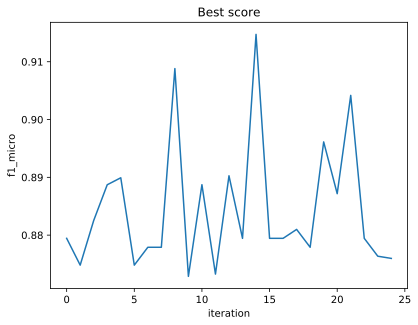

In [360]:
pd.Series(scores).plot()

plt.title('Best score')
plt.ylabel('f1_micro')
plt.xlabel('iteration')

plt.show()

Выведем худшую конфигурацию параметров

In [361]:
results = pd.DataFrame(clf.cv_results_)
results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0  0.257219       0.025734      0.026131         0.006591        0.85     
1  0.252669       0.027743      0.025293         0.007211        0.85     
2  0.327687       0.035248      0.035425         0.013126        0.85     
3  0.332295       0.042544      0.027666         0.008383        0.85     
4  0.297071       0.018326      0.025354         0.006114        0.85     

  param_degree param_gamma                                   params  \
0  2            0.08        {'C': 0.85, 'degree': 2, 'gamma': 0.08}   
1  2            0.09        {'C': 0.85, 'degree': 2, 'gamma': 0.09}   
2  2            0.1         {'C': 0.85, 'degree': 2, 'gamma': 0.1}    
3  2            0.11        {'C': 0.85, 'degree': 2, 'gamma': 0.11}   
4  2            0.12        {'C': 0.85, 'degree': 2, 'gamma': 0.12}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0  0.850077           0.845440           0.837713           0.854714            
1  0.850077           0.842349           0.837713           0.851623            
2  0.851623           0.846986           0.837713           0.851623            
3  0.846986           0.845440           0.837713           0.853168            
4  0.850077           0.848532           0.836167           0.853168            

        ...         split15_train_score  split16_train_score  \
0       ...         0.853442             0.856148              
1       ...         0.851121             0.855762              
2       ...         0.852668             0.855375              
3       ...         0.851508             0.855762              
4       ...         0.851895             0.855762              

   split17_train_score  split18_train_score  split19_train_score  \
0  0.863882             0.864269             0.862828              
1  0.865043             0.866589             0.863215              
2  0.866203             0.865816             0.863988              
3  0.865816             0.866976             0.864374              
4  0.865429             0.866976             0.865920              

   split20_train_score  split21_train_score  split22_train_score  \
0  0.855375             0.858082             0.864269              
1  0.856535             0.857695             0.866203              
2  0.853055             0.857695             0.866203              
3  0.853442             0.857695             0.865043              
4  0.854988             0.859629             0.866203              

   split23_train_score  split24_train_score  mean_train_score  std_train_score  
0  0.855762             0.855100             0.859774          0.004450         
1  0.855375             0.855487             0.860269          0.004760         
2  0.854988             0.855487             0.859944          0.004966         
3  0.853442             0.855100             0.860099          0.005231         
4  0.853055             0.855100             0.859882          0.005222         

[5 rows x 63 columns]

In [362]:
results['mean_test_score'].min() # худшее качество

0.8467058459635014

In [370]:
for index, value in results.iterrows():
    if value['mean_test_score'] == results['mean_test_score'].min():
        print(index)

43


In [371]:
results.iloc[43]['params']

{'C': 0.93, 'degree': 2, 'gamma': 0.11}

In [372]:
svc = SVC(class_weight={1:6}, kernel='poly', C=0.93, degree=2, gamma=0.11)

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

scores = []
scores.extend(cross_val_score(svc, standardized_data, label, cv=rskf, scoring='f1_micro'))

print('Mean score for SVC:', round(np.mean(scores), 5))

Mean score for SVC: 0.84739


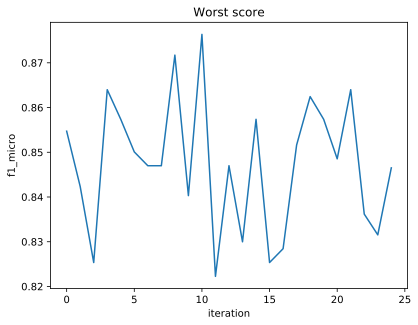

In [373]:
pd.Series(scores).plot()

plt.title('Worst score')
plt.ylabel('f1_micro')
plt.xlabel('iteration')

plt.show()

Полиномиальное ядро с более высокой степенью и более низким штрафом в среднем дает лучшее качество

Построим с дефолтными параметрами

In [374]:
svc = SVC()

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)

scores = []
scores.extend(cross_val_score(svc, standardized_data, label, cv=rskf, scoring='f1_micro'))

print('Mean score for SVC:', round(np.mean(scores), 5))

Mean score for SVC: 0.90733


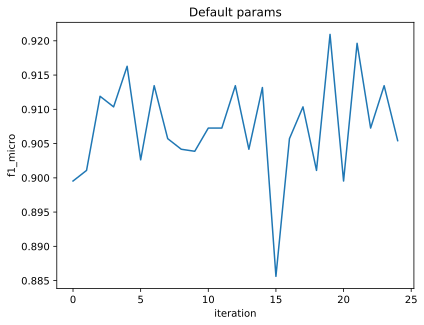

In [375]:
pd.Series(scores).plot()

plt.title('Default params')
plt.ylabel('f1_micro')
plt.xlabel('iteration')

plt.show()

Модель нестабильна как с настроенными параметрами, так и с дефолтными, при этом во втором случае качество выше (почему? :с )

### Задание 6  
  
Для алгоритма AdaBoost с параметрами по умолчанию оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты. 

In [376]:
(trainData, 
 testData, 
 train_label, 
 test_label) = train_test_split(Data,
                                label,
                                test_size=0.3, 
                                random_state=56428234)

In [377]:
from sklearn.ensemble import AdaBoostClassifier

In [378]:
f1_train = []
f1_test = [] 

skf = StratifiedKFold(n_splits=5, shuffle=True)

for train_index, test_index in skf.split(Data, label):
    
    # train data
    x_train = Data.iloc[train_index] # data
    y_train = label.iloc[train_index] # label
    
    # test data
    x_test = Data.iloc[test_index] # data
    y_test = label.iloc[test_index] # label
    
    # model
    ab_model = AdaBoostClassifier()
    ab_model.fit(x_train, y_train) # fitting
    
    # f1 on train on each stage
    scores = []
    for s in ab_model.staged_predict(x_train):
        scores.append(metrics.f1_score(y_train, s))
    f1_train.append(scores)
    del scores
    
    # f1 on test on each stage
    scores = []
    for s in ab_model.staged_predict(x_test):
        scores.append(metrics.f1_score(y_test, s))
    f1_test.append(scores)
    del scores
    
    
# convert to DataFrame
f1_train = pd.DataFrame(f1_train).transpose()
f1_test = pd.DataFrame(f1_test).transpose()

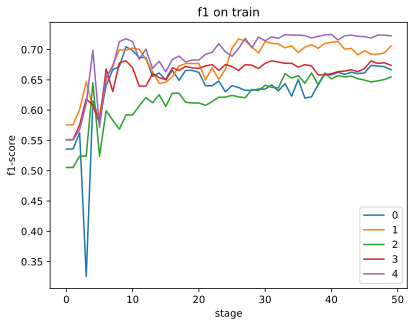

In [379]:
f1_train.plot()

plt.xlabel('stage')
plt.ylabel('f1-score')
plt.title('f1 on train')

plt.show()

На обучающей выборке после добавления 10 дерева качество практически не растет. Кроме того, в одном случае модель показывает очень низкий результат

In [380]:
f1_train.describe()

0          1          2          3          4
count  50.000000  50.000000  50.000000  50.000000  50.000000
mean   0.638919   0.679081   0.618832   0.657423   0.691982 
std    0.056371   0.036775   0.040852   0.031871   0.045504 
min    0.325678   0.575707   0.505338   0.551261   0.551261 
25%    0.633182   0.664501   0.608941   0.658636   0.683024 
50%    0.649673   0.694509   0.626663   0.668800   0.711356 
75%    0.664794   0.703776   0.649358   0.675149   0.721747 
max    0.704762   0.717629   0.661342   0.681529   0.725000

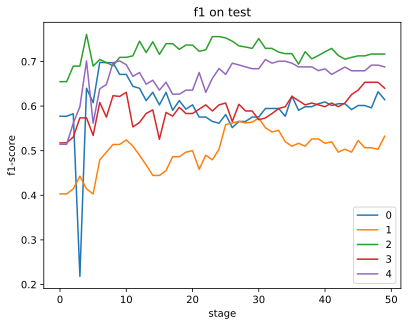

In [381]:
f1_test.plot()

plt.xlabel('stage')
plt.ylabel('f1-score')
plt.title('f1 on test')

plt.show()

In [382]:
f1_test.describe()

0          1          2          3          4
count  50.000000  50.000000  50.000000  50.000000  50.000000
mean   0.598499   0.499187   0.719647   0.592612   0.662662 
std    0.064857   0.044191   0.022591   0.032344   0.044842 
min    0.218182   0.402878   0.654762   0.517483   0.514286 
25%    0.578156   0.481211   0.709302   0.575739   0.648459 
50%    0.599973   0.504902   0.718824   0.595908   0.679245 
75%    0.613846   0.523822   0.734344   0.606897   0.690842 
max    0.697987   0.573248   0.760736   0.653333   0.704403

В некоторых случаях на тестовой выборке наблюдается переобучение

В целом, модель показывает не очень высокий результат

### Задание 7  
  
* Настройте гиперпараметры AdaBoost на 5-fold валидации из 5 повторений, используя в качестве базовых классификаторов дерево решений и SVM. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.    
* Выведите наилучшую конфигурацию параметров для каждого базового классификатора. Сравните качество. 

*Дерево решений*

In [383]:
params = {
    'n_estimators': range(50,301,50),
    'learning_rate': np.array(range(1, 10, 2))/10
}

In [384]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
dtree_model = DecisionTreeClassifier(max_depth=5)
ab_model = AdaBoostClassifier(base_estimator=dtree_model)
clf = GridSearchCV(ab_model, params, cv=rskf, scoring='f1_micro', n_jobs=5, verbose=5)

In [385]:
%%time
clf.fit(Data, label)

Fitting 25 folds for each of 30 candidates, totalling 750 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:   12.2s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   29.3s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:  1.6min
[Parallel(n_jobs=5)]: Done 278 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  4.0min
[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed:  5.5min
[Parallel(n_jobs=5)]: Done 750 out of 750 | elapsed:  6.6min finished


Wall time: 6min 39s


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x000002905CBEF5F8>,
       error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'n_estimators': range(50, 301, 50), 'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=5)

In [386]:
clf.best_score_

0.960408289514383

In [387]:
clf.best_params_

{'learning_rate': 0.5, 'n_estimators': 300}

Алгоритм довольно быстро находит оптимум

In [388]:
ab_model = AdaBoostClassifier(base_estimator=dtree_model, learning_rate=0.5, n_estimators=300)

scores = []
scores.extend(cross_val_score(ab_model, Data, label, cv=rskf, scoring='f1_micro'))

In [389]:
print('Mean score for AdaBoost_DTree:', round(np.mean(scores), 5))

Mean score for AdaBoost_DTree: 0.9596


Качество простого дерева решений, построенного ранее, оцененнное на кросс-валидации: <br> Mean score for DTree: 0.96227

Посмотрим, как модель работает на обучающей и тестовой выборке (для сравнения берем то же разбиение)

In [392]:
(trainData, 
 testData, 
 train_label, 
 test_label) = train_test_split(Data,
                                label,
                                test_size=0.3, 
                                random_state=56428234)

In [393]:
ab_model.fit(trainData, train_label)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=300, random_state=None)

In [394]:
pkl_filename = "task7_ab_dtree_model.pkl"

In [395]:
with open(pkl_filename, 'wb') as file:  
    pickle.dump(ab_model, file)

In [396]:
with open(pkl_filename, 'rb') as file:  
    ab_model = pickle.load(file)

In [397]:
preds = ab_model.predict(trainData)

Accuracy: 1.0 
Balanced accuracy: 1.0 
F1-score:  1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1938
           1       1.00      1.00      1.00       325

   micro avg       1.00      1.00      1.00      2263
   macro avg       1.00      1.00      1.00      2263
weighted avg       1.00      1.00      1.00      2263



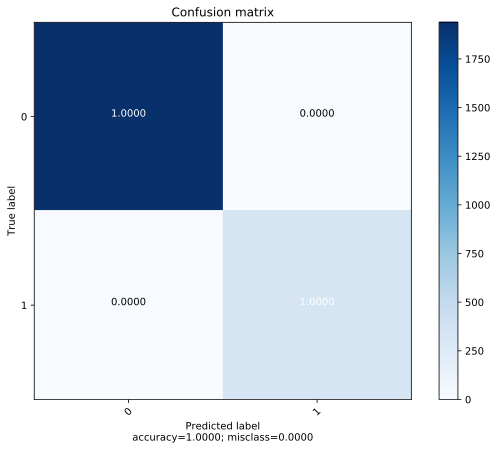

In [398]:
style.use('default')
get_model_quality(preds, train_label)

In [399]:
preds = ab_model.predict(testData)

Accuracy: 0.96082 
Balanced accuracy: 0.96621 
F1-score:  0.85156

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       858
           1       0.76      0.97      0.85       112

   micro avg       0.96      0.96      0.96       970
   macro avg       0.88      0.97      0.91       970
weighted avg       0.97      0.96      0.96       970



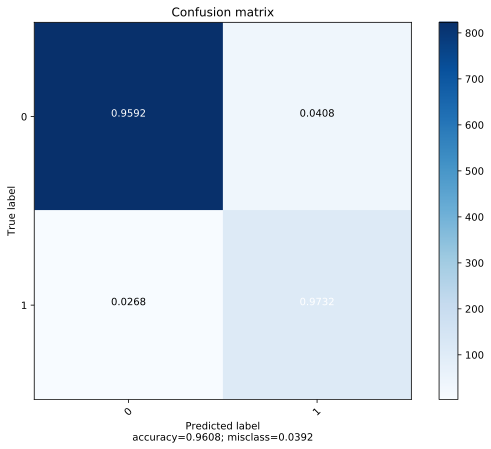

In [400]:
style.use('default')
get_model_quality(preds, test_label)

Алгоритм идеально работает на обучающей выборке и показывает высокое качество на тестовой. Переобучения нет. Но, как и случайный лес, хуже определяет ушедших клиентов

*SVC*

In [401]:
params = {
    'n_estimators': [10, 50],
    'learning_rate': np.array(range(1, 10, 4))/10
}

In [402]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
svc = SVC(class_weight={1:6}, kernel='poly', C=0.85, degree=3, gamma=0.09, probability=True)
ab_model = AdaBoostClassifier(base_estimator=svc)
clf = GridSearchCV(ab_model, params, cv=rskf, scoring='f1_micro', n_jobs=5, verbose=5)

In [403]:
%%time
clf.fit(standardized_data, label)

Fitting 25 folds for each of 6 candidates, totalling 150 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:   59.1s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed: 14.4min
[Parallel(n_jobs=5)]: Done 150 out of 150 | elapsed: 35.5min finished


Wall time: 35min 46s


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x000002905CF0D6D8>,
       error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=SVC(C=0.85, cache_size=200, class_weight={1: 6}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.09, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'n_estimators': [10, 50], 'learning_rate': array([0.1, 0.5, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_micro', verbose=5)

In [404]:
clf.best_score_ 

0.8739870089699969

In [405]:
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 10}

Оптимальными параметрами оказались наименьшие из заданных значений, дальше искать не будем

In [406]:
svc = SVC(class_weight={1:5.8}, kernel='poly', C=1.4, degree=2, gamma=0.12, probability=True)
ab_model = AdaBoostClassifier(base_estimator=svc, learning_rate=0.1, n_estimators=10)
scores = []
scores.extend(cross_val_score(svc, standardized_data, label, cv=rskf, scoring='f1_micro'))

print('Mean score for SVC:', round(np.mean(scores), 5))

Mean score for SVC: 0.84912


Модель показала не лучшее качество. Обучается долго, классифицирует плохо, получилось не очень

## Часть 3. Соревнование по машинному обучению <a id="part3"></a>

В данном задании вам предлагается принять участие в соревновании на kaggle: [PUBG Finish Placement Prediction](https://www.kaggle.com/c/pubg-finish-placement-prediction).  
Задача соревнования заключается в том, чтобы предсказать итоговый результат игрока (место в турнирном зачете) в [популярной](https://meduza.io/feature/2017/12/22/u-etoy-igry-net-syuzheta-i-prokachki-ya-potratil-na-nee-100-chasov-zhizni-i-eto-tolko-nachalo) игре PlayerUnknownʼs Battlegrounds на основании результатов предыдущих игр.  
 
Подробное описание задачи, данные и их описание, целевую метрику и правила вы можете найти на странице соревнования. 

Для участия в соревновании, т.е. для того, чтобы скачать данные, сабмитить результаты и попасть в leaderboard, вам необходимо создать аккаунт на [kaggle](https://www.kaggle.com/).

Данное соревнование является `Kernels Only` - это означает, что вы должны сабмитить не файл с предсказаниями для тестовой выборки, а код, который будет выполняться (преобразовывать данные, обучать модель) и создавать файл с предсказаниями. Как это сделать сказано в [описании](https://www.kaggle.com/c/pubg-finish-placement-prediction#Kernels-FAQ), также есть хороший [тьюториал](https://www.kaggle.com/dansbecker/submitting-from-a-kernel).

После того, как вы выполните сабмит, в leaderboard вы сможете посмотреть качество вашей модели на тестовой выборке и место в общем зачете.  
Вы можете делать много (до 10 в день) сабмитов - в leaderbord всегда отображается самый лучший (остальные можно посмотреть в `My Submissions`).

### Задание  
  
Необходимо построить и засабмитить модель, которая:   
* Задача минимум – покажет на тестовой выборке качество выше baseline: 0.2
* Задача максимум - решит задачу как можно точнее  
  
При решении можно и нужно выполнять различные преобразования признаков и применять различные модели машинного обучения.  

В качестве результата необходимо: 
* Сказать ваш логин на kaggle, чтобы мы могли найти вас в leaderboard
* Предоставить скрипт, выполняющий преобразования данных (из формата начальных данных в тот формат, который должна принимать на вход модель) и предсказания, а также сохраненную обученную модель. 
* Предоставить скрипт, который вы сабмитили.
* Сделать краткое описание преобразования данных и итоговой модели. В описание можно также включить некоторые результаты анализа данных (если считаете их полезными и интересными) и собственную оценку модели на кросс-валидации.  
  
По результатам будет составлен наш локальный leaderboard. 